# **Pathways & Performance: A Student Insight Report**

#Objective

To classify students' academic performance based on various academic, behavioral, and demographic factors using machine learning classification models. The goal is to predict whether a student will perform poorly, average, or excellently — helping identify students at academic risk early.

#Data Preprocessing

1) Handle missing values.

Encode categorical variables.

Normalize or standardize features if necessary.


2) Model Training:

Split the data into training and testing sets (e.g., 80/20 split).

Train the Random Forest model and evaluate its performance using metrics like accuracy, precision, recall, and F1-score.


3) Model Evaluation:

Use cross-validation to assess the model's generalizability.

Analyze feature importance to understand which factors most influence student grades.


4) Model Tuning:

Optimize hyperparameters using grid search or random search.


#**Type of problem : Classsification**

# Algorithm

1) Random Forest

2) Logistic Regression

3) XGBoost / LightGBM

4) K-Nearest Neighbors

5) Support Vector Machine (SVM)

**Dataset Details:**
Source : Kaggle - Engineering Student Journey

Year : 2024

Location : India


#Stage 1



#**Import data**




In [1]:
import pandas as pd

url="https://raw.githubusercontent.com/lawrence0302/DSML/refs/heads/main/Student%20Final.csv"

df=pd.read_csv(url)

df.head()

Student ID                 Name  Age  Gender  \
0  b37412a3-fa5c-40ca-b087-7109a47482d7                 Amit   21    Male   
1  65001423-faeb-4d19-a550-8ea26133a34d         Tina Ballard   19    Male   
2  228aaf1d-8710-4c8d-bfec-001b0df01f34                Meena   19  Female   
3  1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales   23    Male   
4  5122db4a-14c8-44d7-b2f4-e869f69d3dd7            Siddharth   20    Male   

  Branch  Average GPA  Backlogs  Attendance (%) Coding club Culturnal Club  \
0   MECH         6.99         0           70.45          No             No   
1    ECE         6.46         0           65.45         Yes             No   
2  CIVIL         7.08         0           84.79          No             No   
3    ECE         6.92         2           62.26         Yes             No   
4    EEE         7.09         0           97.12          No             No   

   ... CTC (LPA) Alumni Path Sem1 GPA Sem2 GPA Sem3 GPA Sem4 GPA Sem5 GPA  \
0  ...      0.00         NaN     8.34     5.24     6.06     7.81     7.18   
1  ...      0.00         NaN     7.37     6.37     6.45     5.99     6.55   
2  ...      0.00         NaN     5.79     8.82     7.03     6.92     7.67   
3  ...      5.89    Research     7.90     4.26     8.19     7.52     8.32   
4  ...      0.00         NaN     6.86     6.24     7.64     7.15     5.91   

  Sem6 GPA Sem7 GPA Sem8 GPA  
0     7.04     8.26     5.99  
1     6.99     6.46     5.52  
2     6.01     7.75     6.62  
3     6.80     4.94     7.43  
4     6.18     8.19     8.54  

[5 rows x 34 columns]

#**To Perform Initial EDA**

1) Feature - Gender, Branch,Average GPA,Backlogs, Attendance (%),Coding club,Culturnal Club, Robotics, Literary Society,Entrepreneurship Cell,C++, Data Science, Java, Machine Learning, Python, SQL ,Web Development ,Internship Done

2) Target - Placement Status



1. Shape of the dataset

In [2]:
df.shape

(1999, 34)

2. Column names and data types and Categorical features


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             1999 non-null   object 
 1   Name                   1999 non-null   object 
 2   Age                    1999 non-null   int64  
 3   Gender                 1999 non-null   object 
 4   Branch                 1999 non-null   object 
 5   Average GPA            1999 non-null   float64
 6   Backlogs               1999 non-null   int64  
 7   Attendance (%)         1999 non-null   float64
 8   Coding club            1999 non-null   object 
 9   Culturnal Club         1999 non-null   object 
 10  Robotics               1999 non-null   object 
 11  Literary Society       1999 non-null   object 
 12  Entrepreneurship Cell  1999 non-null   object 
 13  C++                    1999 non-null   object 
 14  Data Science           1999 non-null   object 
 15  Java

In [4]:
for col in df.select_dtypes(include='object').columns:
    print("\n",df[col].value_counts())


 Student ID
840d718e-de7b-4218-95bd-11db983c3cbd    1
b37412a3-fa5c-40ca-b087-7109a47482d7    1
65001423-faeb-4d19-a550-8ea26133a34d    1
228aaf1d-8710-4c8d-bfec-001b0df01f34    1
1aa67474-e200-4157-ad54-c95aaa4d52a8    1
                                       ..
05a321d4-578e-468a-a1bf-4038a4de8d28    1
6d59c708-298e-45cc-a9e6-eaa3024e260c    1
7a8d03aa-782a-45e0-88ca-765192f5df7b    1
63b664f4-0452-4779-90ff-de646edaba8c    1
c24369e7-2387-4af6-94c3-a832b231c60b    1
Name: count, Length: 1999, dtype: int64

 Name
Arjun              64
Pooja              59
Rahul              58
Anil               57
Ramya              55
                   ..
Terry Ward          1
Kenneth Andrews     1
Ashley Perry        1
Ryan Bryant         1
Abigail Potter      1
Name: count, Length: 1012, dtype: int64

 Gender
Female    1005
Male       994
Name: count, dtype: int64

 Branch
MECH     353
CIVIL    352
IT       342
EEE      337
ECE      323
CSE      292
Name: count, dtype: int64

 Coding club
No  

In [5]:
df['Placement Status'] = df['Placement Status'].replace({'Placed': 'yes', 'Not Placed': 'No'})
df['Placement Status'].head()

0     No
1     No
2     No
3    yes
4     No
Name: Placement Status, dtype: object

In [6]:
unique_counts = df.nunique()
print(unique_counts)

Student ID               1999
Name                     1012
Age                         6
Gender                      2
Branch                      6
Average GPA               166
Backlogs                    6
Attendance (%)            888
Coding club                 2
Culturnal Club              2
Robotics                    2
Literary Society            2
Entrepreneurship Cell       2
C++                         2
Data Science                2
Java                        2
Machine Learning            2
Python                      2
SQL                         2
Web Development             2
Internship Done             2
Internship Domain           6
Placement Status            2
Placement Domain            6
CTC (LPA)                 448
Alumni Path                 4
Sem1 GPA                  361
Sem2 GPA                  366
Sem3 GPA                  368
Sem4 GPA                  374
Sem5 GPA                  369
Sem6 GPA                  362
Sem7 GPA                  376
Sem8 GPA  

3. Statistics of numeric columns and Missing Values

In [7]:
df.describe()

Age  Average GPA     Backlogs  Attendance (%)    CTC (LPA)  \
count  1999.000000  1999.000000  1999.000000     1999.000000  1999.000000   
mean     20.474237     7.002616     0.966983       78.933147     5.795898   
std       1.728062     0.341148     0.990905       11.730931     6.563695   
min      18.000000     6.050000     0.000000       60.040000     0.000000   
25%      19.000000     6.770000     0.000000       69.000000     0.000000   
50%      21.000000     7.000000     1.000000       78.310000     3.460000   
75%      22.000000     7.215000     1.000000       89.220000    11.260000   
max      23.000000     8.070000     5.000000       99.980000    19.990000   

          Sem1 GPA    Sem2 GPA     Sem3 GPA     Sem4 GPA     Sem5 GPA  \
count  1999.000000  1999.00000  1999.000000  1999.000000  1999.000000   
mean      6.976433     7.08021     6.980905     6.961736     7.037894   
std       0.966329     1.03160     0.985273     0.983697     0.984407   
min       4.000000     4.10000     4.000000     4.000000     4.000000   
25%       6.330000     6.39000     6.280000     6.275000     6.370000   
50%       6.980000     7.09000     6.940000     6.910000     7.030000   
75%       7.670000     7.82000     7.630000     7.640000     7.685000   
max      10.000000    10.00000    10.000000     9.630000     9.780000   

          Sem6 GPA     Sem7 GPA     Sem8 GPA  
count  1999.000000  1999.000000  1999.000000  
mean      6.939355     6.990310     7.054812  
std       0.954357     1.018425     1.032945  
min       4.150000     4.000000     4.000000  
25%       6.270000     6.300000     6.355000  
50%       6.930000     6.970000     7.110000  
75%       7.575000     7.700000     7.765000  
max      10.000000     9.920000    10.000000

In [8]:
df.isnull().sum()

Student ID                  0
Name                        0
Age                         0
Gender                      0
Branch                      0
Average GPA                 0
Backlogs                    0
Attendance (%)              0
Coding club                 0
Culturnal Club              0
Robotics                    0
Literary Society            0
Entrepreneurship Cell       0
C++                         0
Data Science                0
Java                        0
Machine Learning            0
Python                      0
SQL                         0
Web Development             0
Internship Done             0
Internship Domain        1017
Placement Status            0
Placement Domain          967
CTC (LPA)                   0
Alumni Path               967
Sem1 GPA                    0
Sem2 GPA                    0
Sem3 GPA                    0
Sem4 GPA                    0
Sem5 GPA                    0
Sem6 GPA                    0
Sem7 GPA                    0
Sem8 GPA                    0
dtype: int64

#**Stage 2**

#Handling Missing Values

In [9]:
#Handling missing values in the dataframe
df.drop(columns=['Alumni Path','Placement Domain','Internship Domain'],inplace=True)


In [10]:
df.isnull().sum()

Student ID               0
Name                     0
Age                      0
Gender                   0
Branch                   0
Average GPA              0
Backlogs                 0
Attendance (%)           0
Coding club              0
Culturnal Club           0
Robotics                 0
Literary Society         0
Entrepreneurship Cell    0
C++                      0
Data Science             0
Java                     0
Machine Learning         0
Python                   0
SQL                      0
Web Development          0
Internship Done          0
Placement Status         0
CTC (LPA)                0
Sem1 GPA                 0
Sem2 GPA                 0
Sem3 GPA                 0
Sem4 GPA                 0
Sem5 GPA                 0
Sem6 GPA                 0
Sem7 GPA                 0
Sem8 GPA                 0
dtype: int64

In [11]:
unique_counts = df.nunique()
print(unique_counts)

Student ID               1999
Name                     1012
Age                         6
Gender                      2
Branch                      6
Average GPA               166
Backlogs                    6
Attendance (%)            888
Coding club                 2
Culturnal Club              2
Robotics                    2
Literary Society            2
Entrepreneurship Cell       2
C++                         2
Data Science                2
Java                        2
Machine Learning            2
Python                      2
SQL                         2
Web Development             2
Internship Done             2
Placement Status            2
CTC (LPA)                 448
Sem1 GPA                  361
Sem2 GPA                  366
Sem3 GPA                  368
Sem4 GPA                  374
Sem5 GPA                  369
Sem6 GPA                  362
Sem7 GPA                  376
Sem8 GPA                  377
dtype: int64


#Handling Duplicates

In [12]:
unique_counts = df.nunique()
print(unique_counts)

Student ID               1999
Name                     1012
Age                         6
Gender                      2
Branch                      6
Average GPA               166
Backlogs                    6
Attendance (%)            888
Coding club                 2
Culturnal Club              2
Robotics                    2
Literary Society            2
Entrepreneurship Cell       2
C++                         2
Data Science                2
Java                        2
Machine Learning            2
Python                      2
SQL                         2
Web Development             2
Internship Done             2
Placement Status            2
CTC (LPA)                 448
Sem1 GPA                  361
Sem2 GPA                  366
Sem3 GPA                  368
Sem4 GPA                  374
Sem5 GPA                  369
Sem6 GPA                  362
Sem7 GPA                  376
Sem8 GPA                  377
dtype: int64


In [13]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

Box Ploting to verify whether the Data has outliers


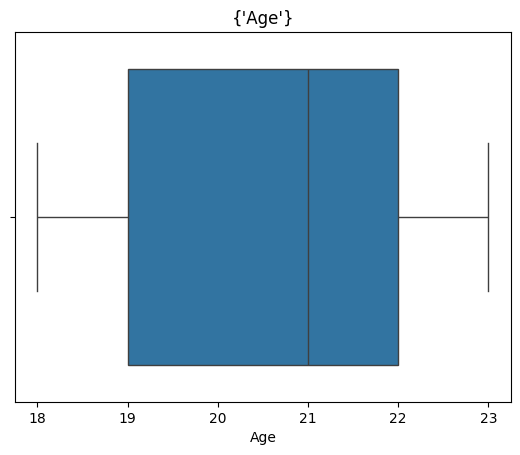

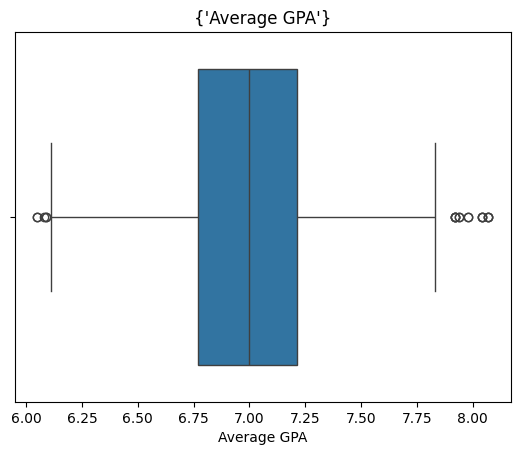

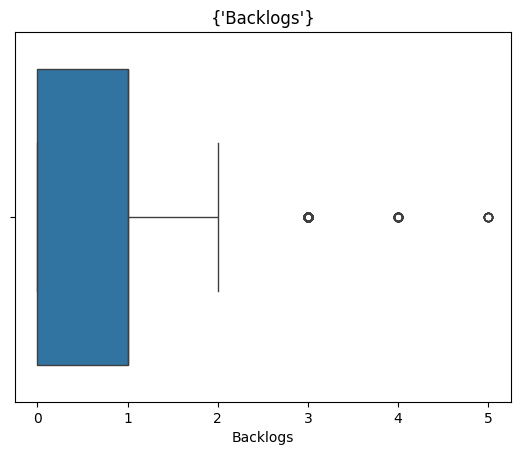

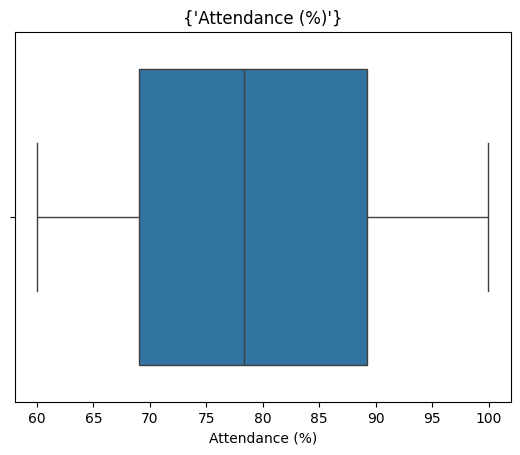

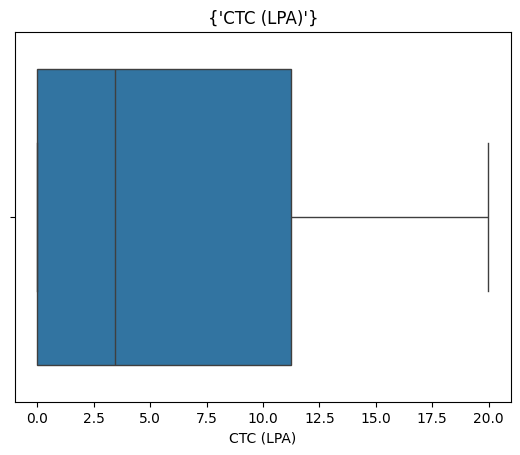

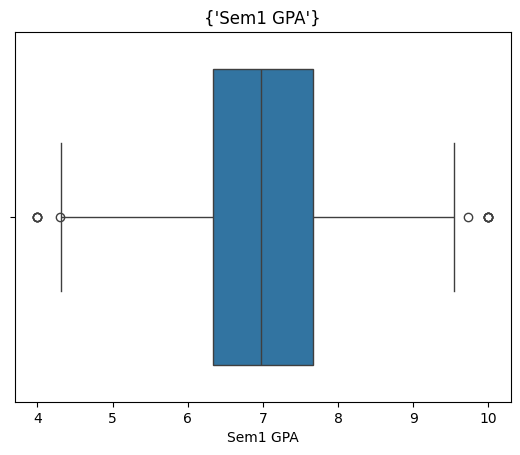

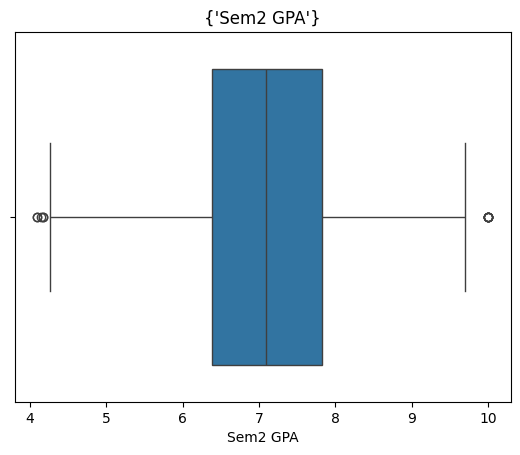

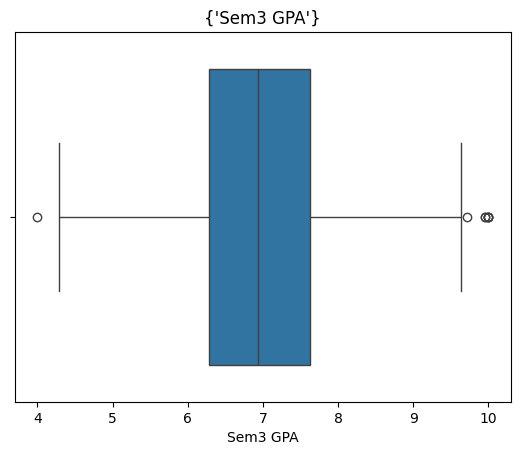

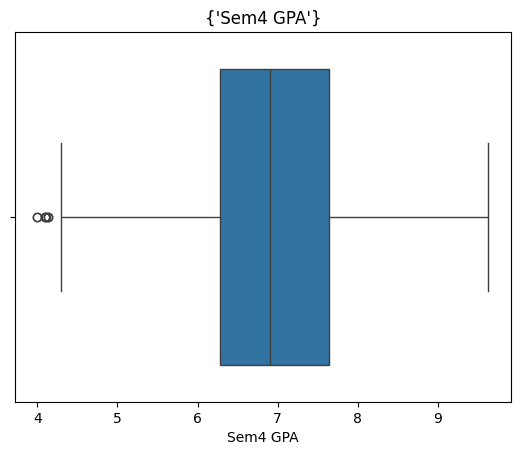

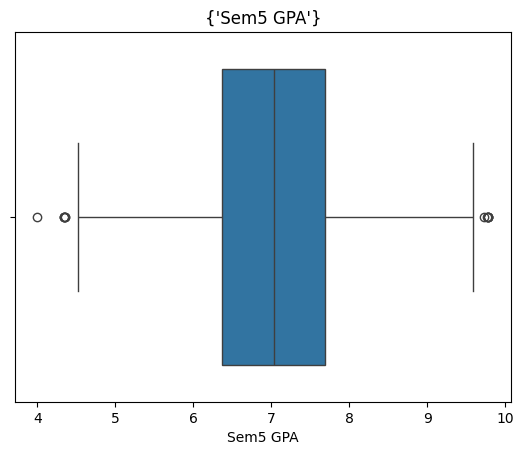

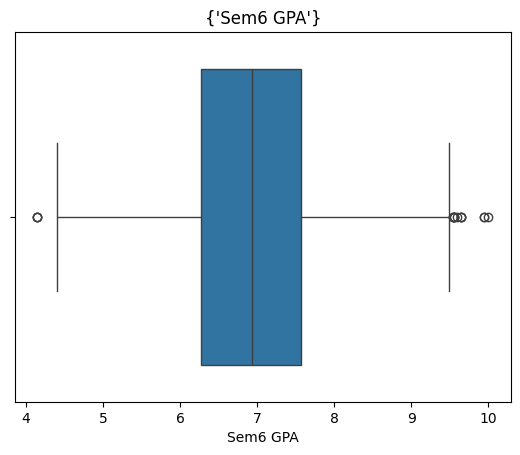

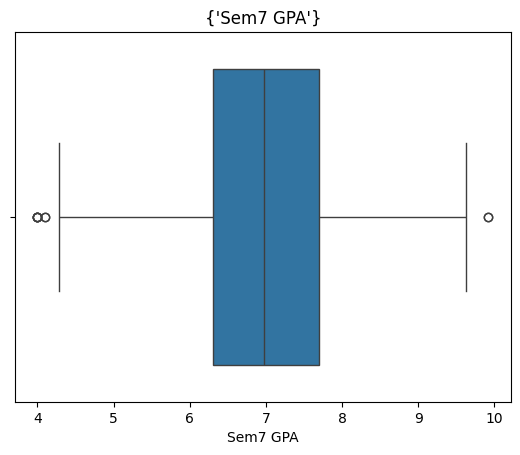

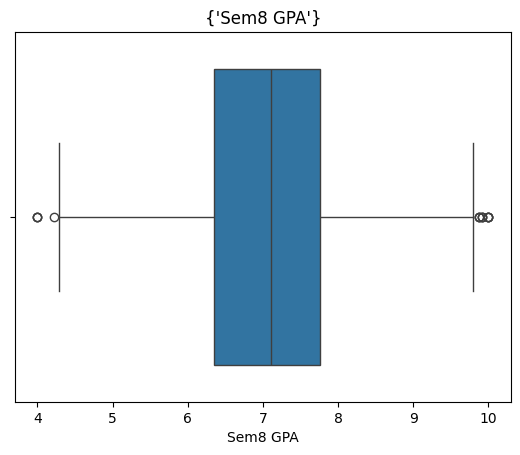

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title({col})
    plt.show()


#Handling Outliers using IQR

In [15]:
df[numeric_cols]

Age  Average GPA  Backlogs  Attendance (%)  CTC (LPA)  Sem1 GPA  \
0      21         6.99         0           70.45       0.00      8.34   
1      19         6.46         0           65.45       0.00      7.37   
2      19         7.08         0           84.79       0.00      5.79   
3      23         6.92         2           62.26       5.89      7.90   
4      20         7.09         0           97.12       0.00      6.86   
...   ...          ...       ...             ...        ...       ...   
1994   19         7.69         2           92.45       0.00      7.00   
1995   23         7.25         0           96.35       0.00      7.36   
1996   18         6.92         0           75.32       0.00      5.12   
1997   22         7.09         0           94.20       8.89      8.39   
1998   20         6.52         0           60.28       0.00      5.96   

      Sem2 GPA  Sem3 GPA  Sem4 GPA  Sem5 GPA  Sem6 GPA  Sem7 GPA  Sem8 GPA  
0         5.24      6.06      7.81      7.18      7.04      8.26      5.99  
1         6.37      6.45      5.99      6.55      6.99      6.46      5.52  
2         8.82      7.03      6.92      7.67      6.01      7.75      6.62  
3         4.26      8.19      7.52      8.32      6.80      4.94      7.43  
4         6.24      7.64      7.15      5.91      6.18      8.19      8.54  
...        ...       ...       ...       ...       ...       ...       ...  
1994      7.76      8.93      7.41      7.57      7.15      8.17      7.53  
1995      7.55      6.75      6.36      7.07      5.91      8.10      8.87  
1996      5.48      6.98      7.29      7.48      6.70      9.53      6.77  
1997      7.11      8.32      5.64      6.56      6.71      6.89      7.08  
1998      7.67      6.20      6.05      5.56      6.52      6.92      7.24  

[1999 rows x 13 columns]

In [16]:
def remove_outliers_iqr(data, columns):
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (1761, 31)


# Handling Skewness

In [17]:
skewness = df_no_outliers[numeric_cols].skew()
skewness

Age               0.018093
Average GPA      -0.044250
Backlogs          0.371136
Attendance (%)    0.100034
CTC (LPA)         0.629427
Sem1 GPA         -0.044061
Sem2 GPA         -0.002311
Sem3 GPA          0.109884
Sem4 GPA          0.158342
Sem5 GPA          0.043089
Sem6 GPA          0.017506
Sem7 GPA         -0.017209
Sem8 GPA         -0.115209
dtype: float64

Reducing Skewness of the Backlogs

/tmp/ipython-input-18-330056323.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Backlogs'], shade=True)


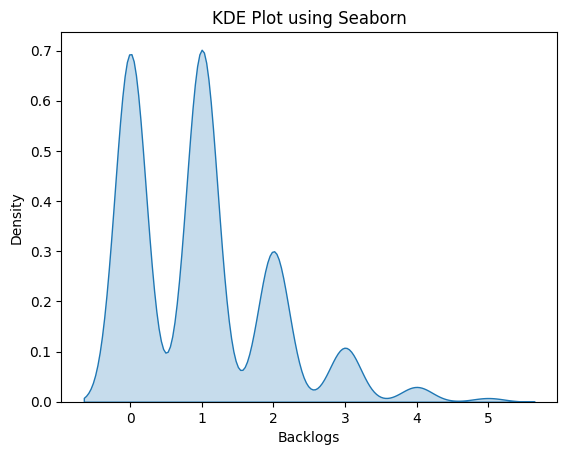

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['Backlogs'], shade=True)
plt.title('KDE Plot using Seaborn')
plt.show()

In [19]:
import numpy as np

df['Backlogs'] = np.log1p(df['Backlogs'])

/tmp/ipython-input-20-330056323.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Backlogs'], shade=True)


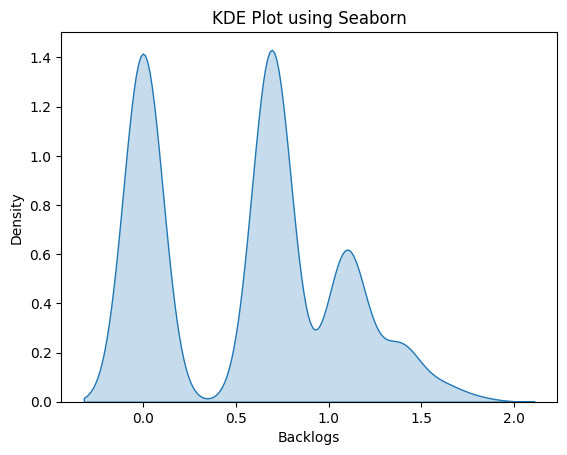

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['Backlogs'], shade=True)
plt.title('KDE Plot using Seaborn')
plt.show()

In [21]:
skewness = df[numeric_cols].skew()
skewness

Age               0.009737
Average GPA       0.062825
Backlogs          0.182787
Attendance (%)    0.083244
CTC (LPA)         0.640529
Sem1 GPA         -0.012792
Sem2 GPA         -0.034849
Sem3 GPA          0.149878
Sem4 GPA          0.093428
Sem5 GPA          0.010333
Sem6 GPA          0.118463
Sem7 GPA         -0.066060
Sem8 GPA         -0.056568
dtype: float64

#**Visualization**

Univariate

Skewness: 0.01


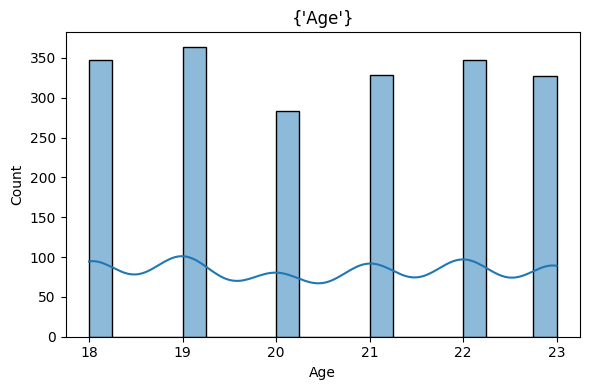

Skewness: 0.06


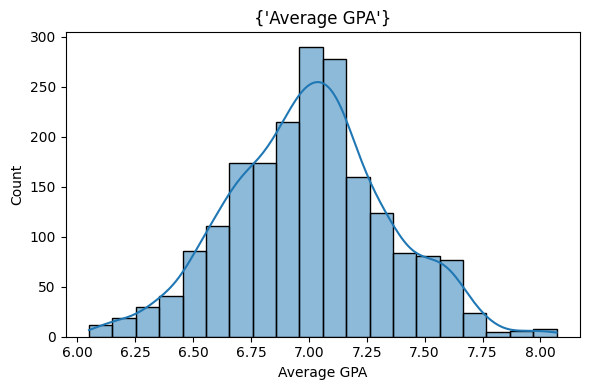

Skewness: 0.18


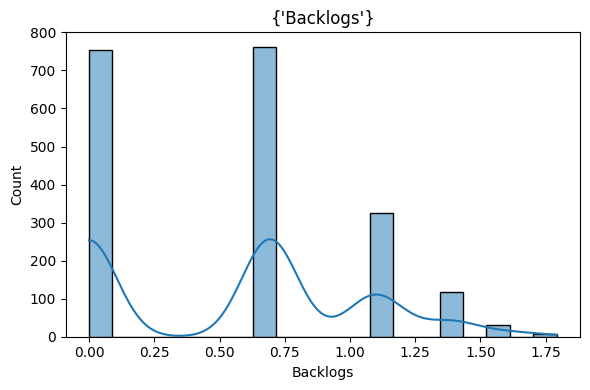

Skewness: 0.08


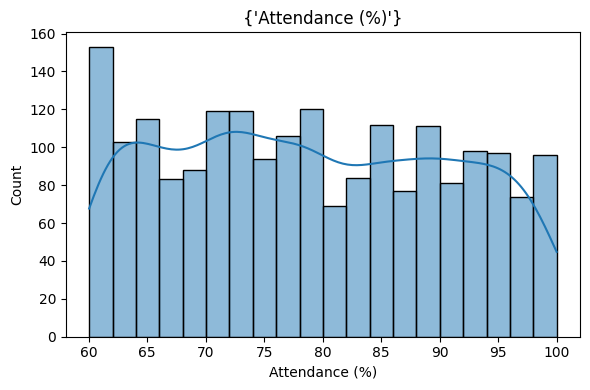

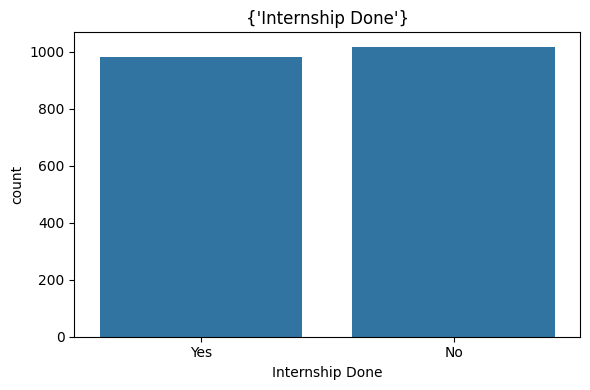

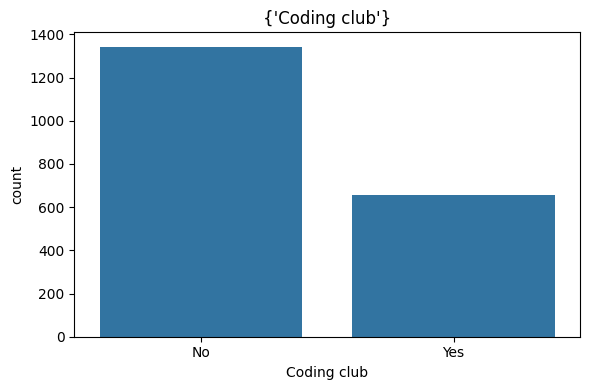

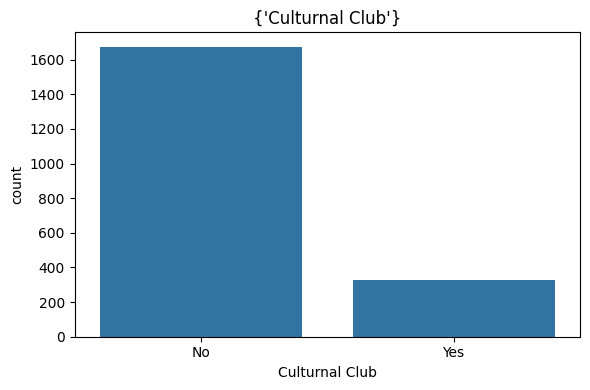

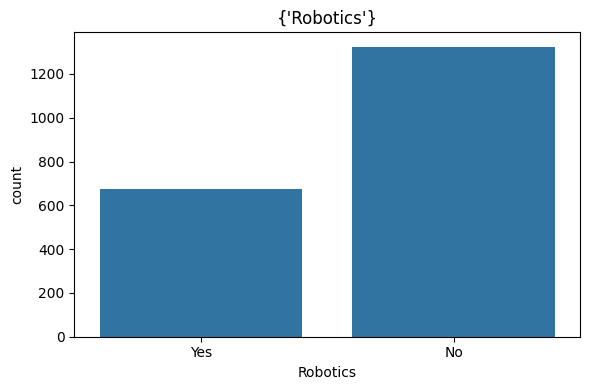

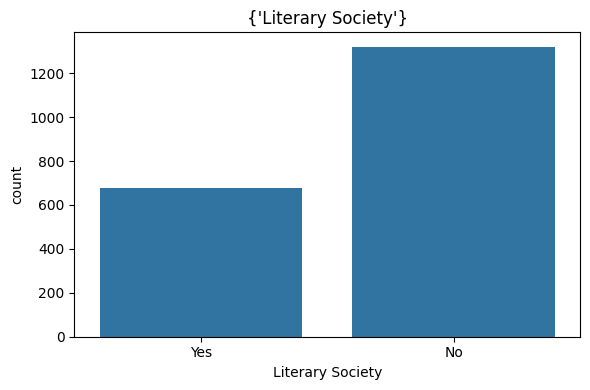

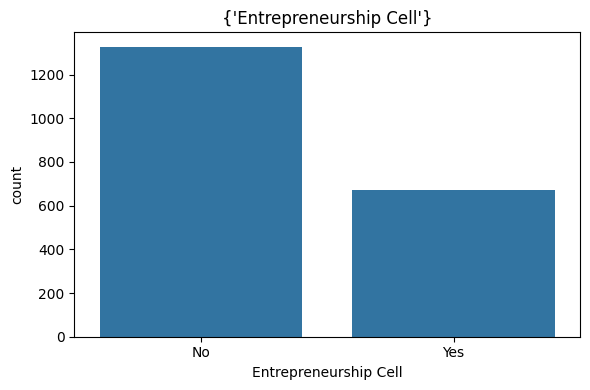

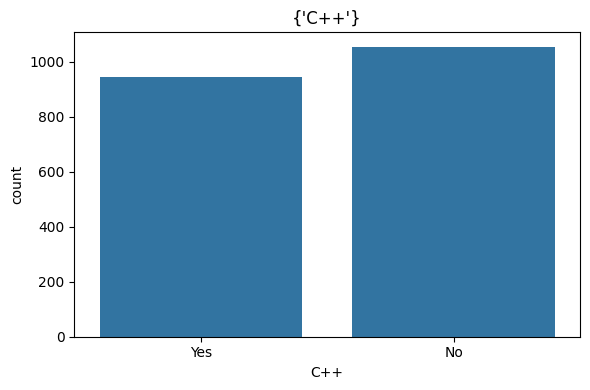

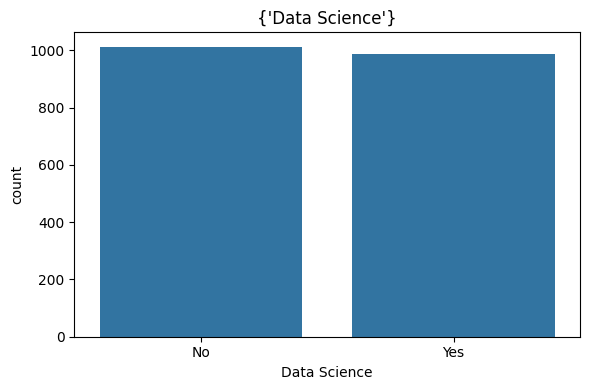

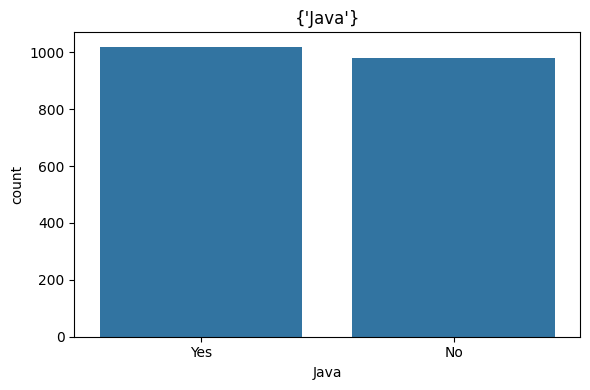

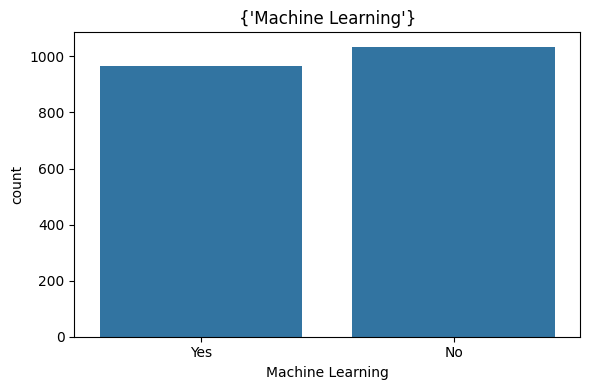

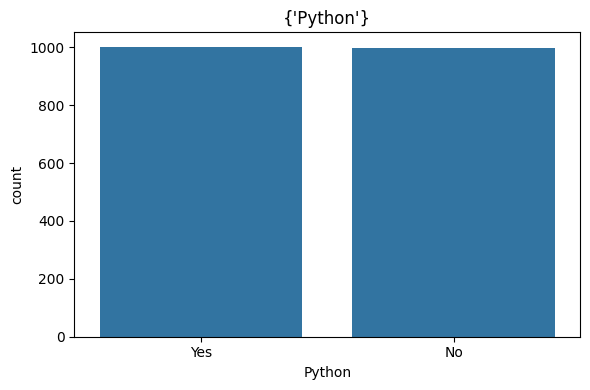

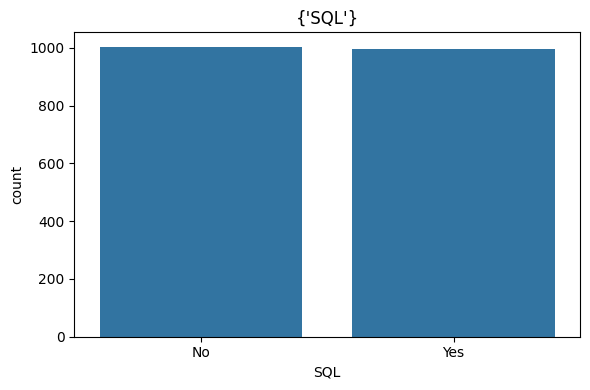

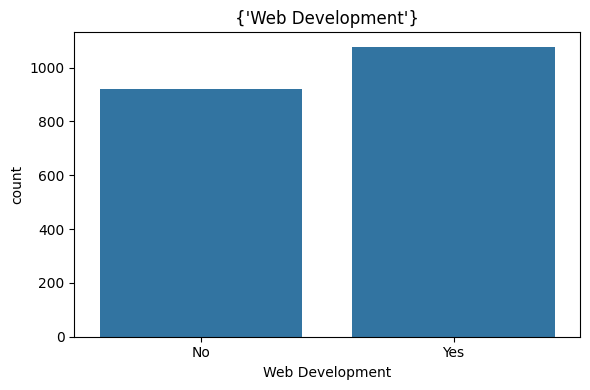

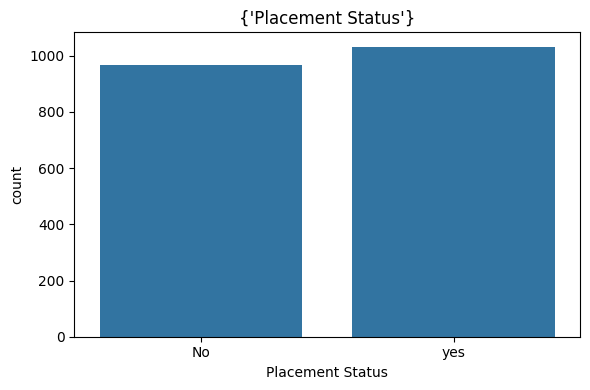

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)', 'Internship Done','Coding club','Culturnal Club', 'Robotics', 'Literary Society','Entrepreneurship Cell','C++', 'Data Science', 'Java', 'Machine Learning', 'Python', 'SQL' ,'Web Development','Placement Status']  # example columns

for col in features:
    plt.figure(figsize=(6, 4))

    if df[col].dtype == 'object':
        # Categorical Feature
        sns.countplot(data=df, x=col)
        plt.title({col})
    else:
        # Numerical Feature
        sns.histplot(df[col], kde=True, bins=20)
        plt.title({col})
        print(f"Skewness: {df[col].skew():.2f}")

    plt.tight_layout()
    plt.show()


Bivariate

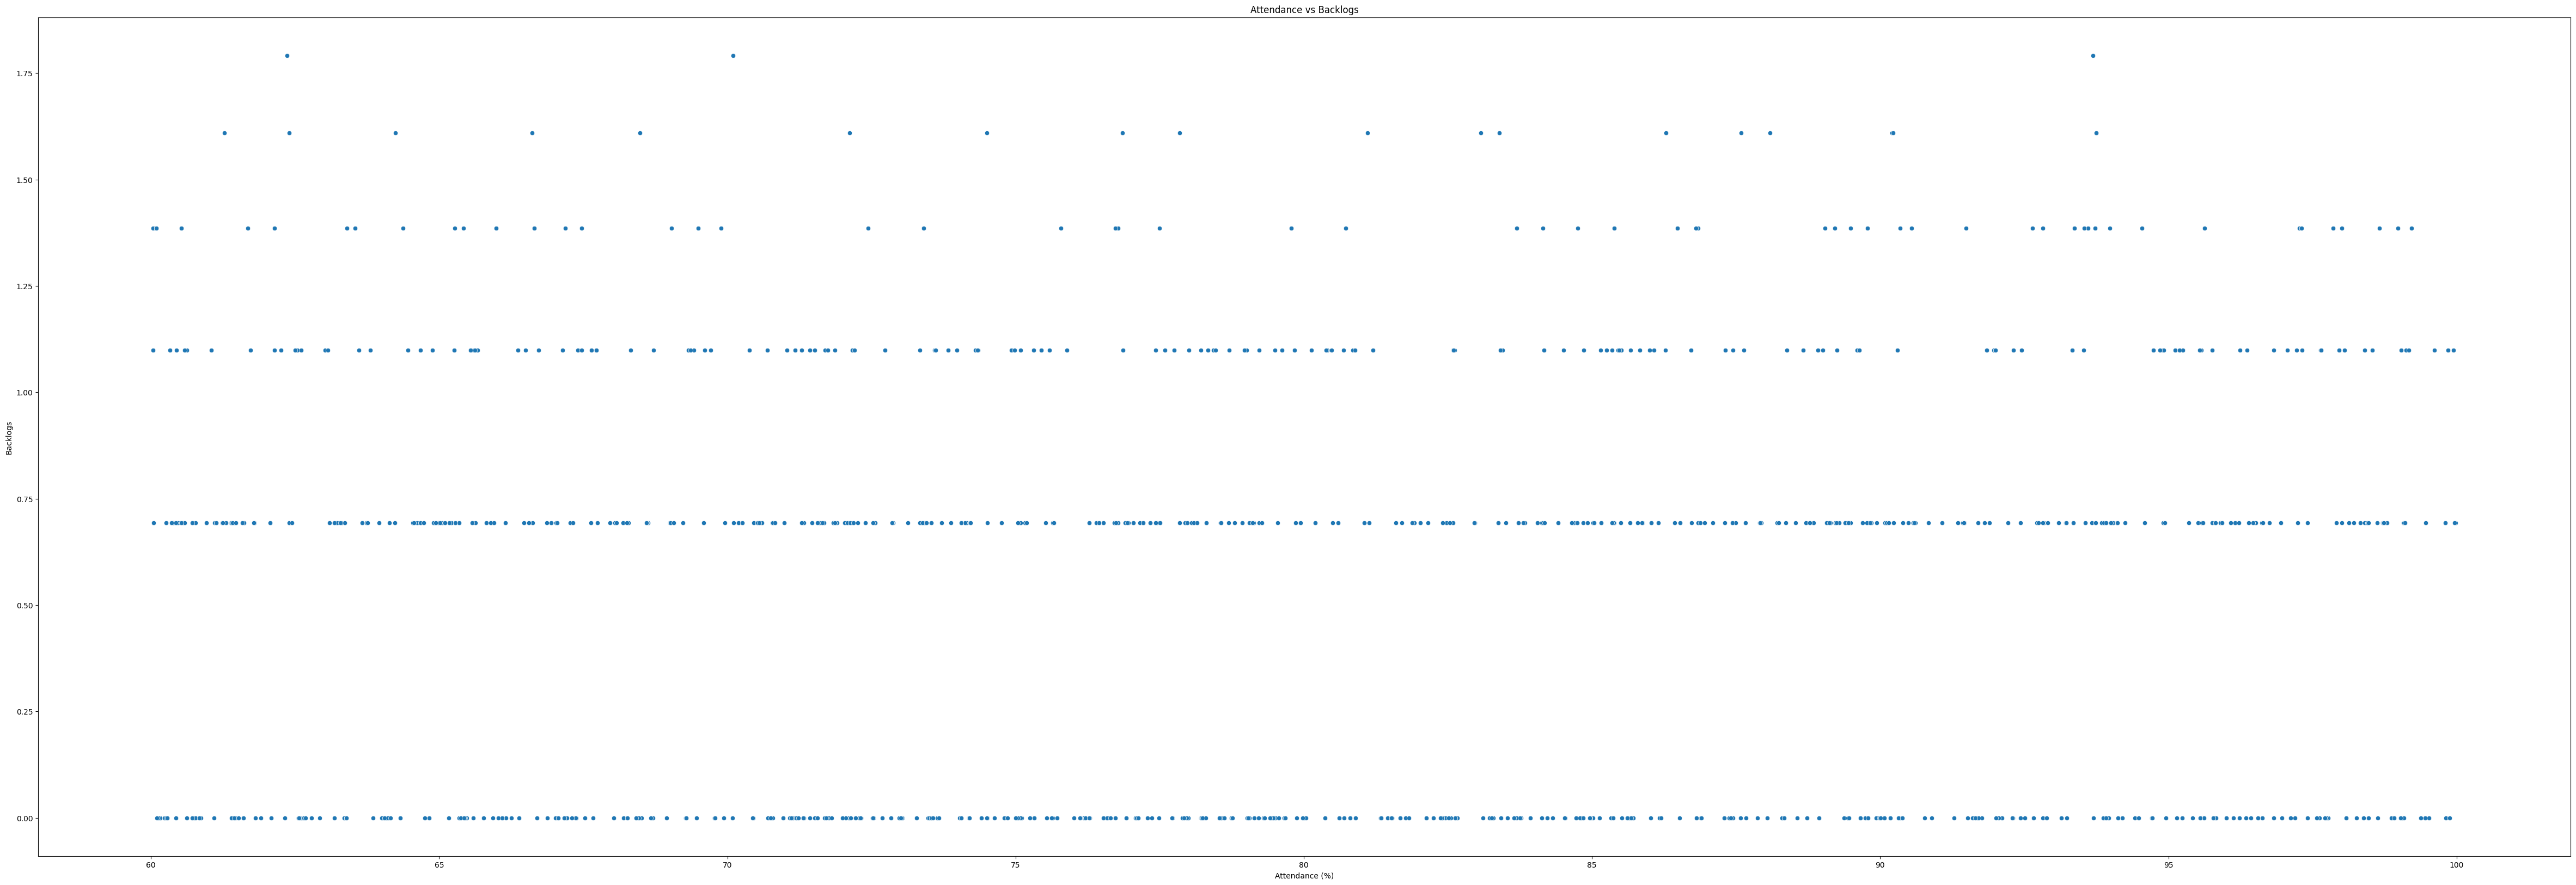

In [23]:
# 1. Attendance vs Backlogs
plt.figure(figsize=(60, 20))
sns.scatterplot(data=df, x='Attendance (%)', y='Backlogs')
plt.title("Attendance vs Backlogs")
plt.show()


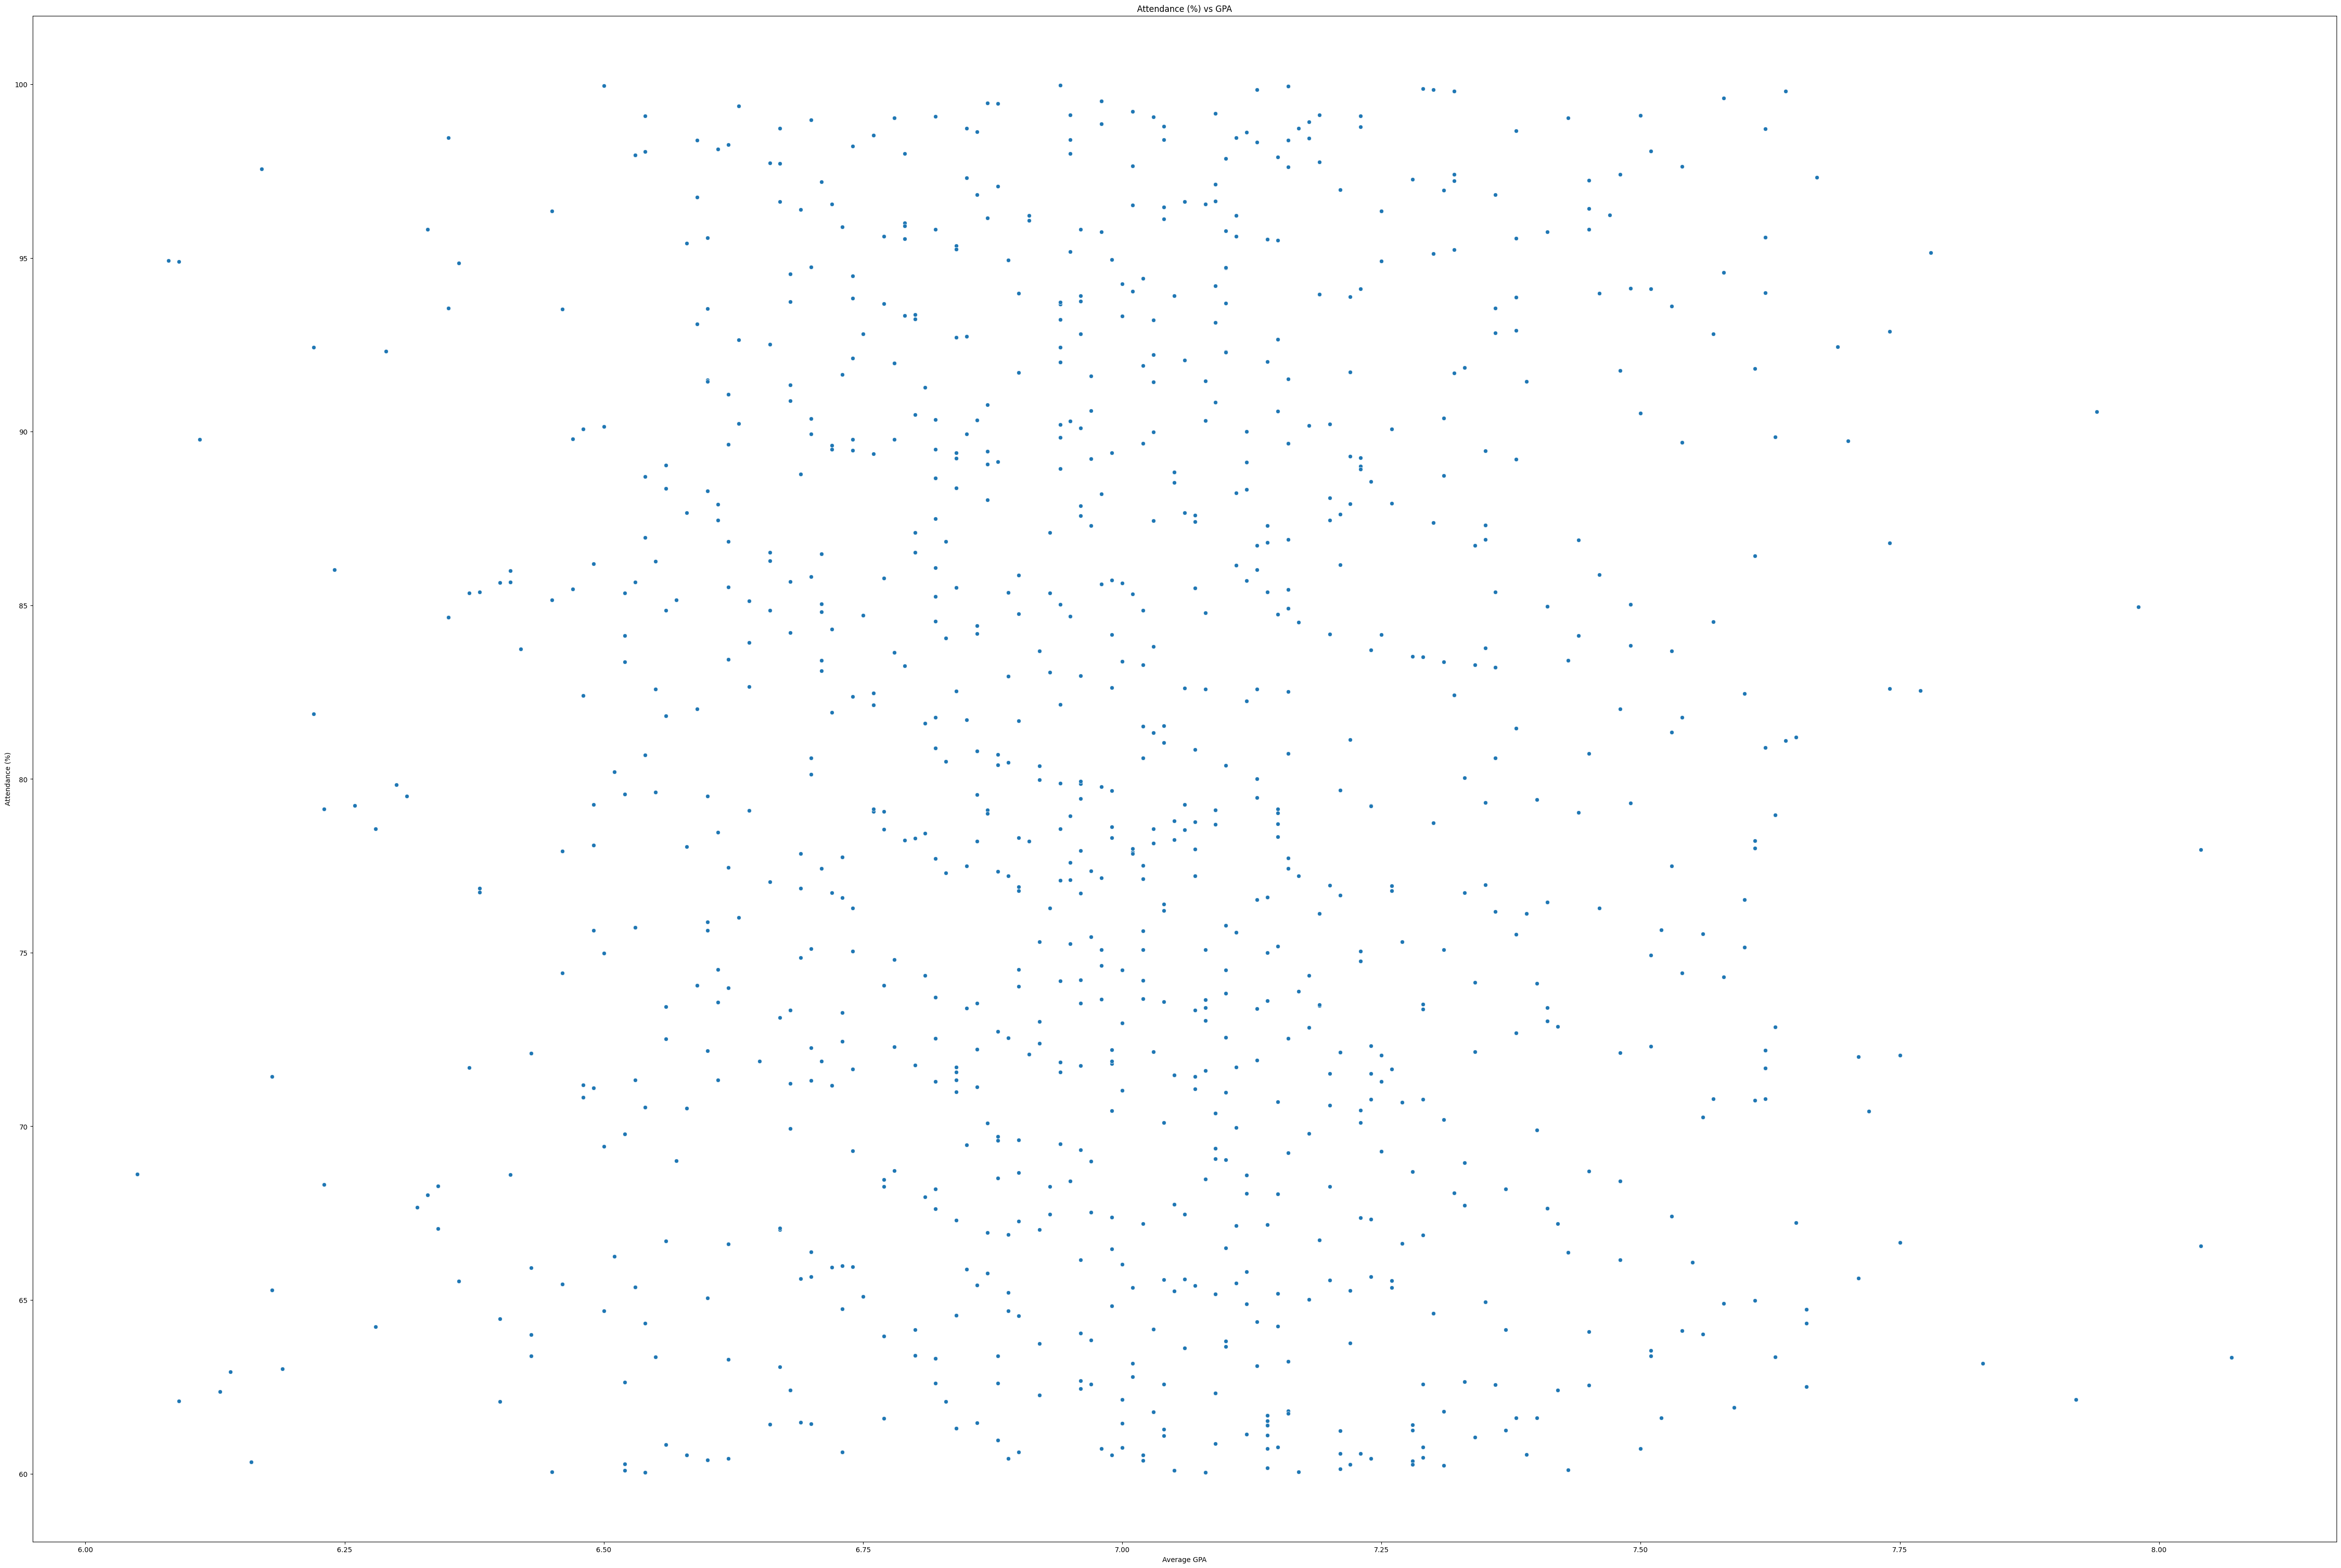

In [24]:

# 2. Attendance (%) vs GPA
plt.figure(figsize=(60, 40))
sns.scatterplot(data=df, x='Average GPA', y='Attendance (%)')
plt.title("Attendance (%) vs GPA")
plt.show()



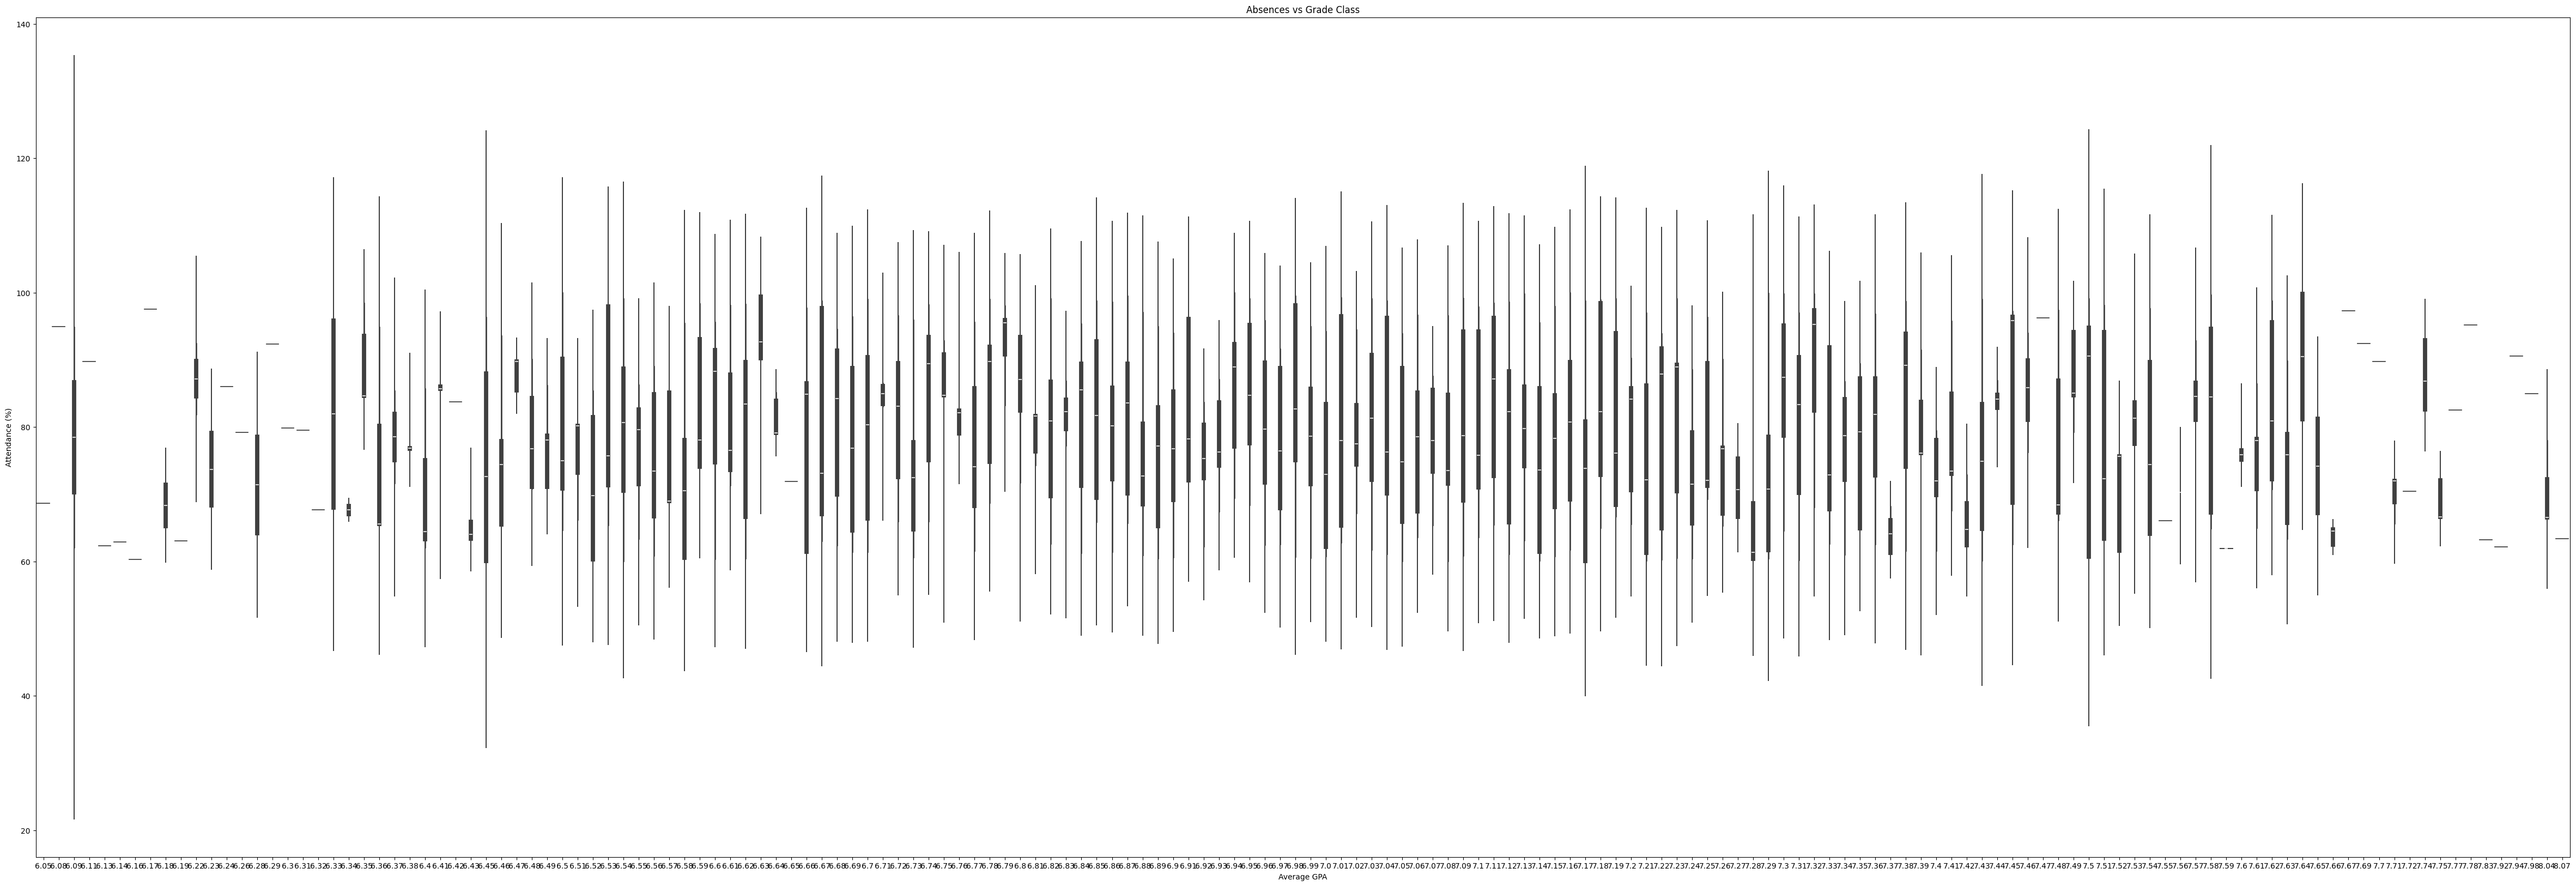

In [25]:
# 3. Attendance vs GPA
plt.figure(figsize=(60, 20))
sns.violinplot(data=df, x='Average GPA', y='Attendance (%)')
plt.title("Absences vs Grade Class")
plt.show()



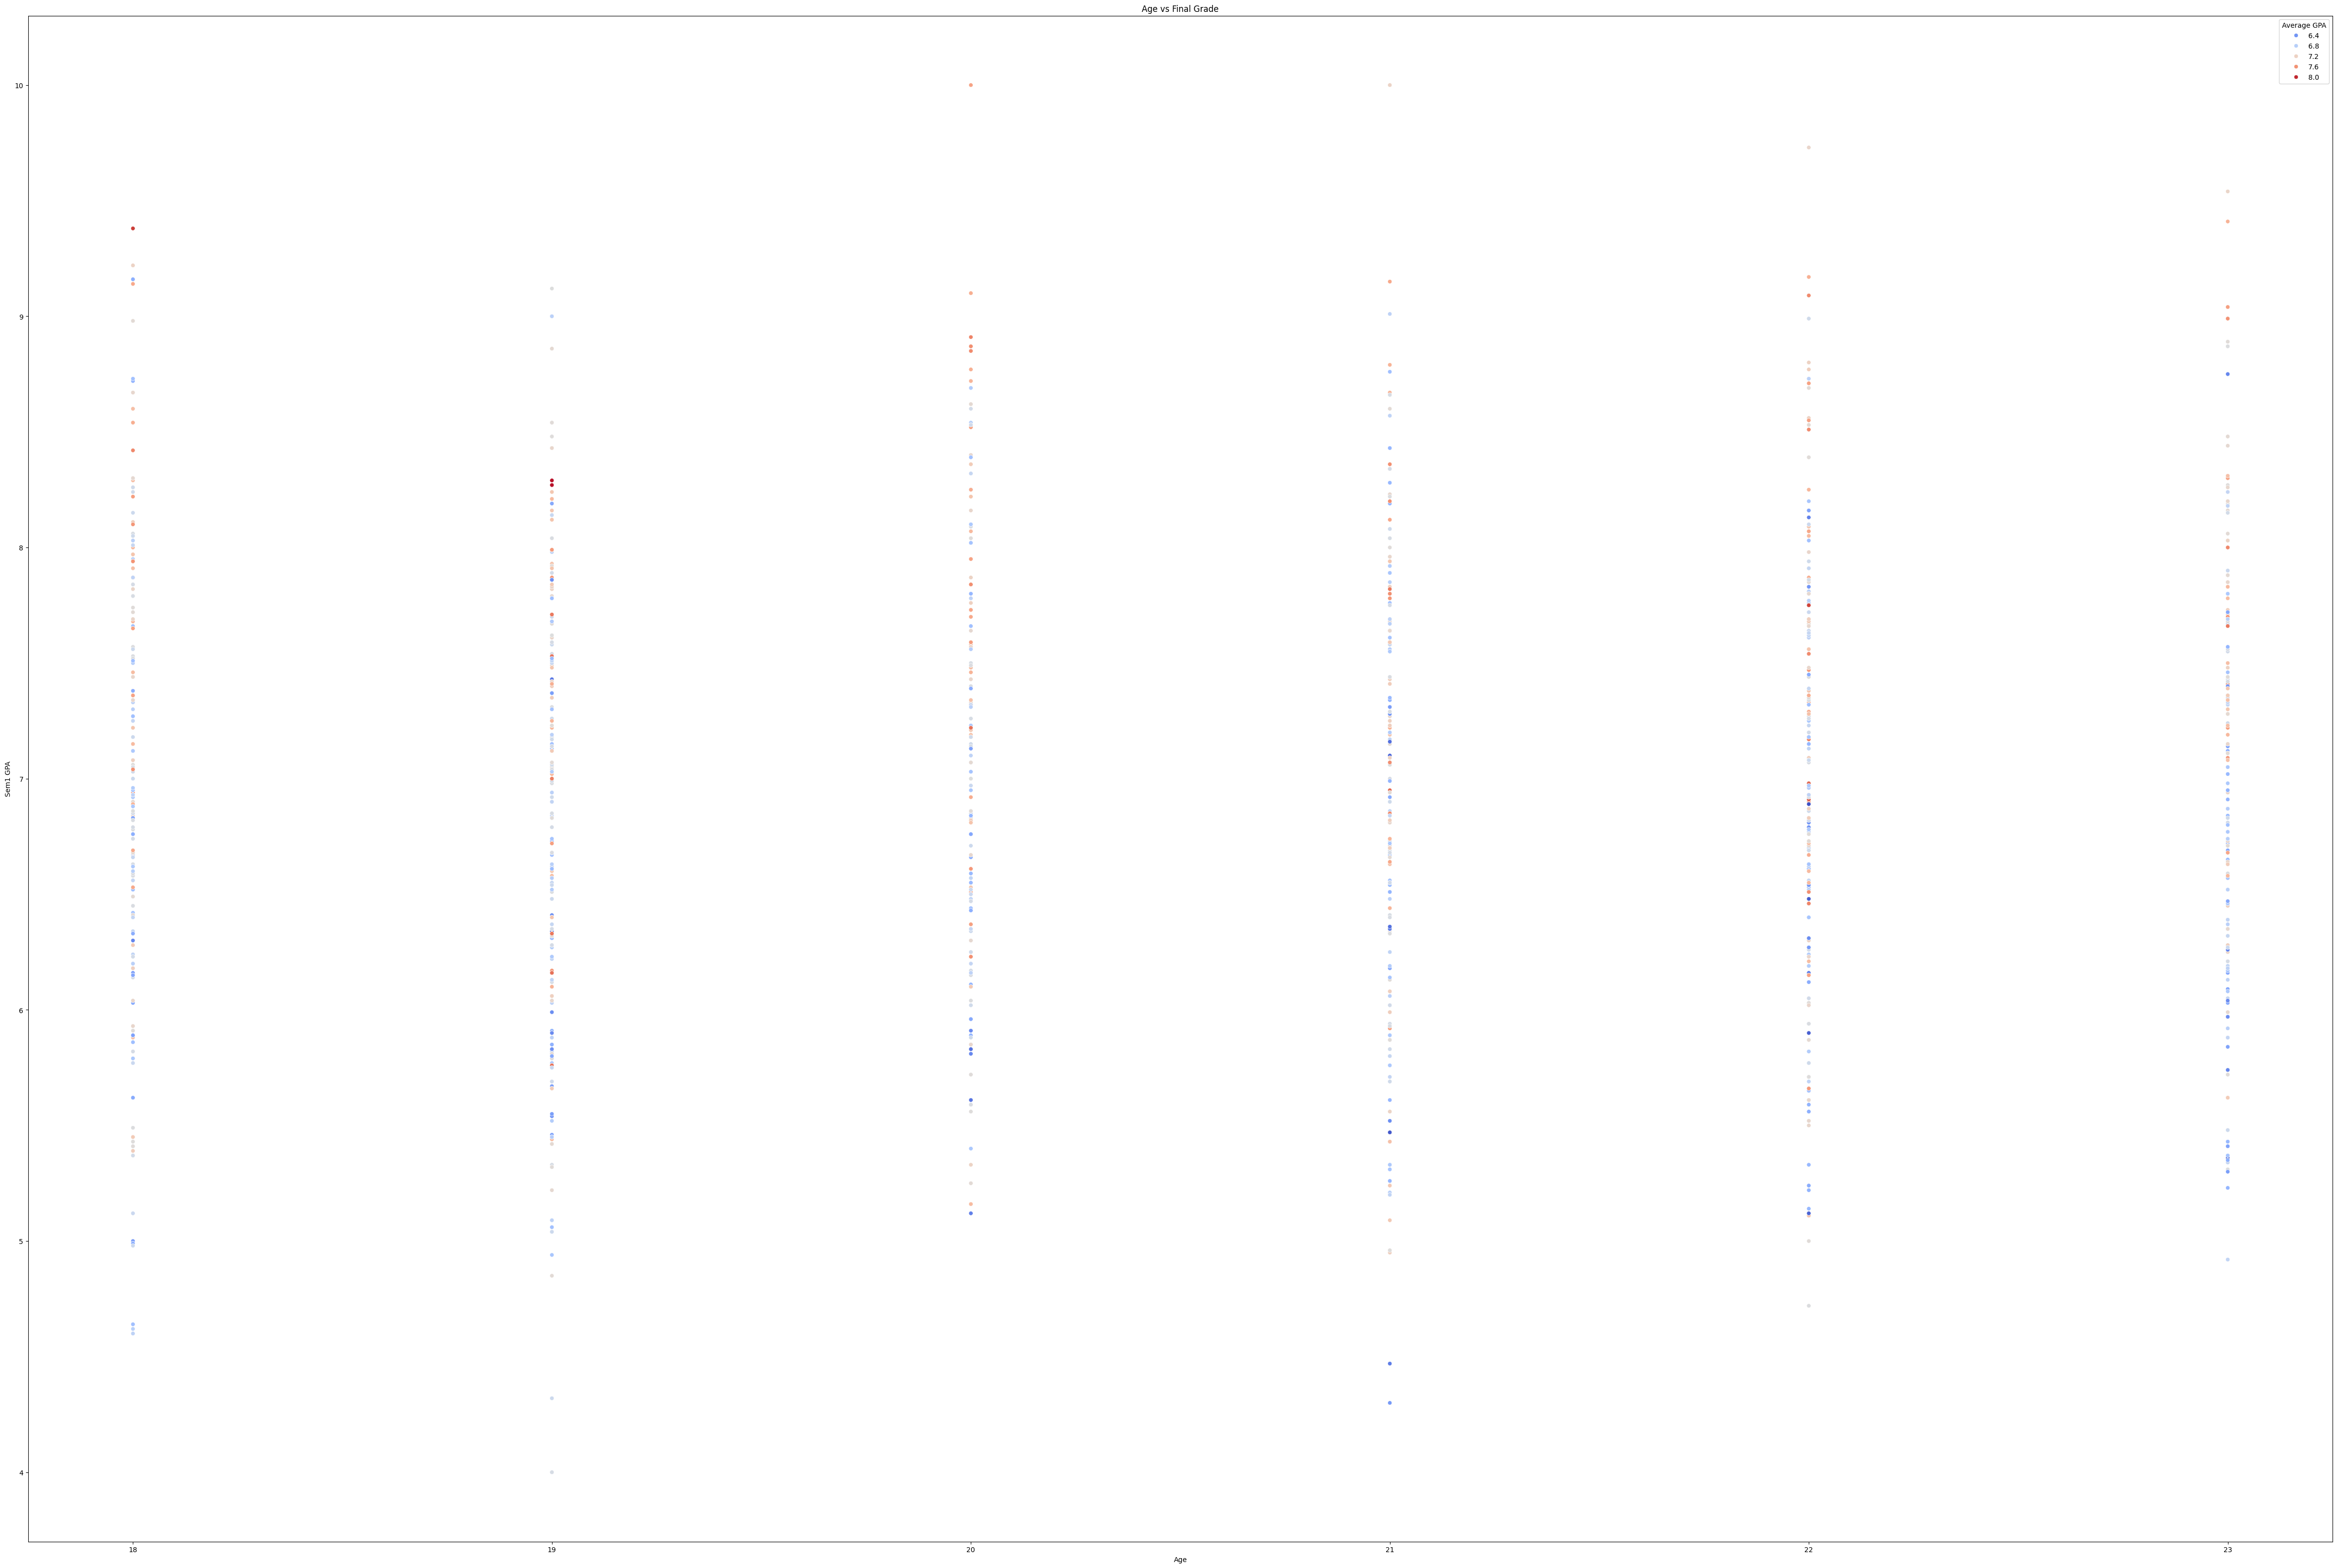

In [26]:
# 4. Age vs GPA
plt.figure(figsize=(60, 40))
sns.scatterplot(data=df, x='Age', y='Sem1 GPA', hue='Average GPA', palette='coolwarm')
plt.title("Age vs Final Grade")
plt.show()


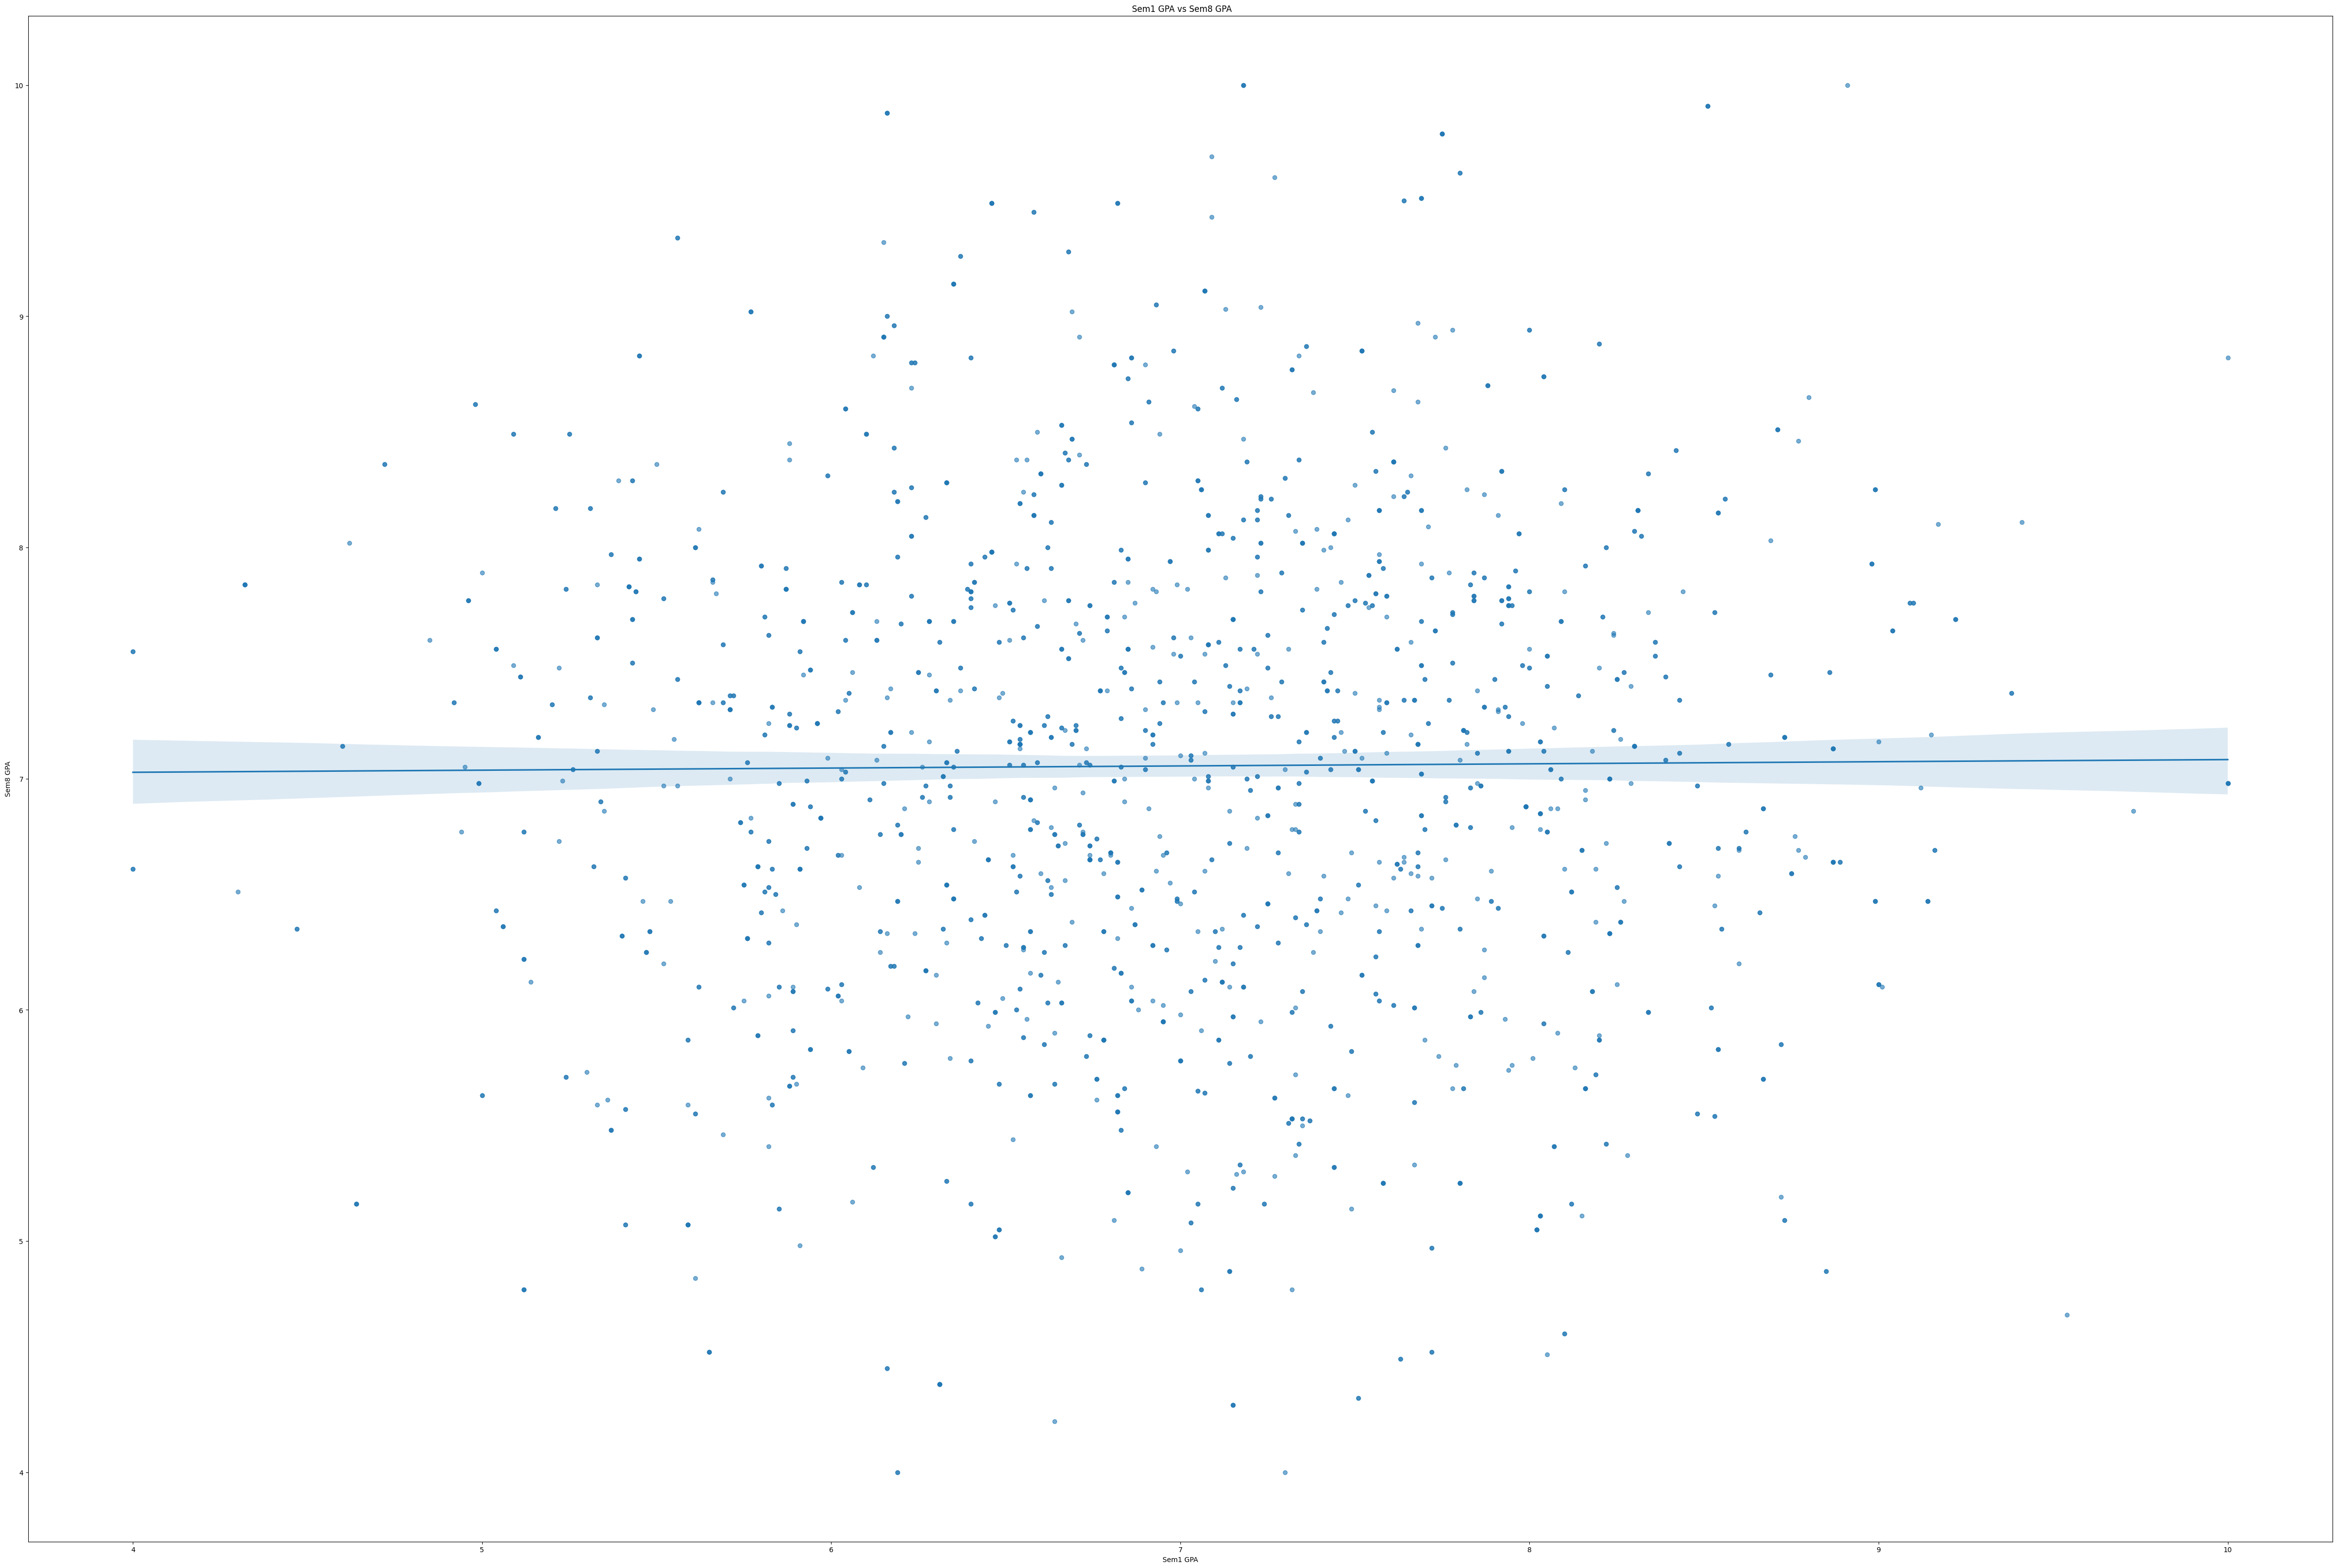

In [27]:

# 5. Sem1 GPA vs Sem8 GPA (1st vs final grade)
plt.figure(figsize=(60, 40))
sns.regplot(data=df, x='Sem1 GPA', y='Sem8 GPA', scatter_kws={'alpha':0.6})
plt.title(" Sem1 GPA vs Sem8 GPA")
plt.show()

1. Attendance vs Backlogs

We can find that Between 60% and 85% attendance, there's a wider spread of backlog values (0 to 2 or more).
A few students have high attendance (>90%) yet still have 1 or 2 backlogs.
These might indicate issues unrelated to attendance, such as academic difficulty or health.

2. Attendance (%) vs GPA

The data points are widely scattered, and there is no strong linear correlation between attendance and GPA.
This suggests attendance alone does not strongly determine GPA.

3. Attendance vs GPA

Absence is not a strong standalone discriminator of grade class (GPA) in this dataset.

4. Age vs GPA

Age does not appear to be a strong predictor of Final GPA.
There’s a wide variation in performance among students of the same age.

5. Sem1 GPA vs Sem8 GPA (1st vs final grade)

There is little to no correlation between Semester 1 and Semester 4 GPA based on this data.


Multivariate


Here we can interperate the distribution of Backlogs based on the Attendance and average GPA

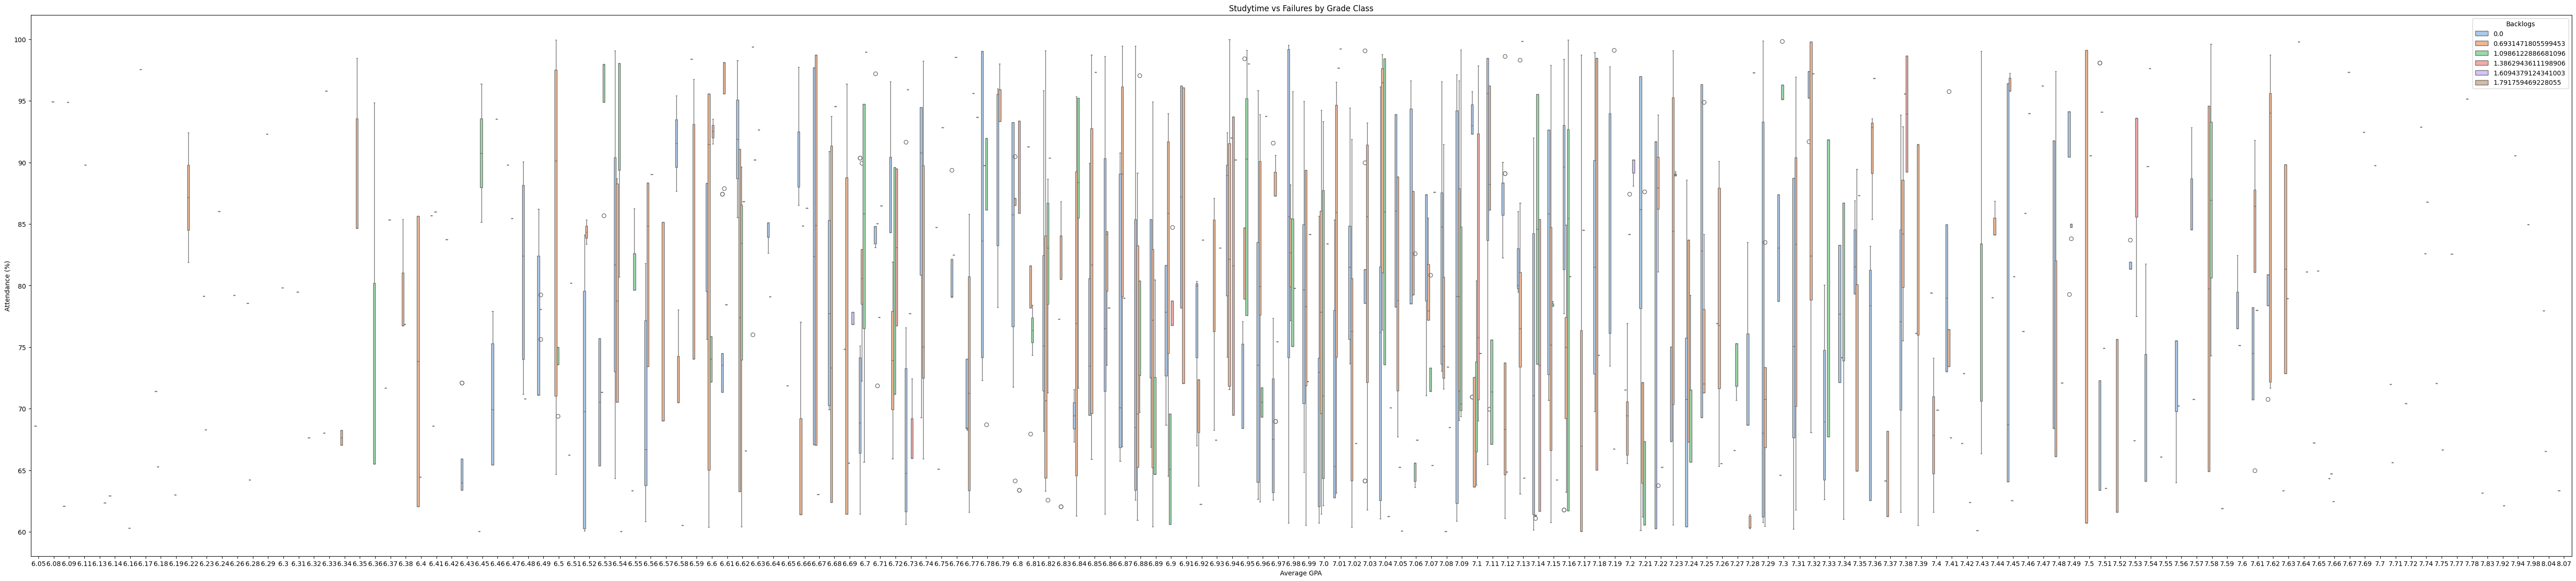

In [28]:
#Boxplot: Backlogs & Attendance vs GPA
plt.figure(figsize=(70, 15))
sns.boxplot(data=df, x='Average GPA', y='Attendance (%)', hue='Backlogs', palette='pastel')
plt.title("Studytime vs Failures by Grade Class")
plt.show()


Although lower GPAs seem to have more variation in backlogs, some students with high GPAs still have backlogs, which could suggest:
Some courses may be disproportionately affecting GPA. Grade inflation in some subjects despite failing others.

3D Scatter: Attendance, Backlogs, GPA

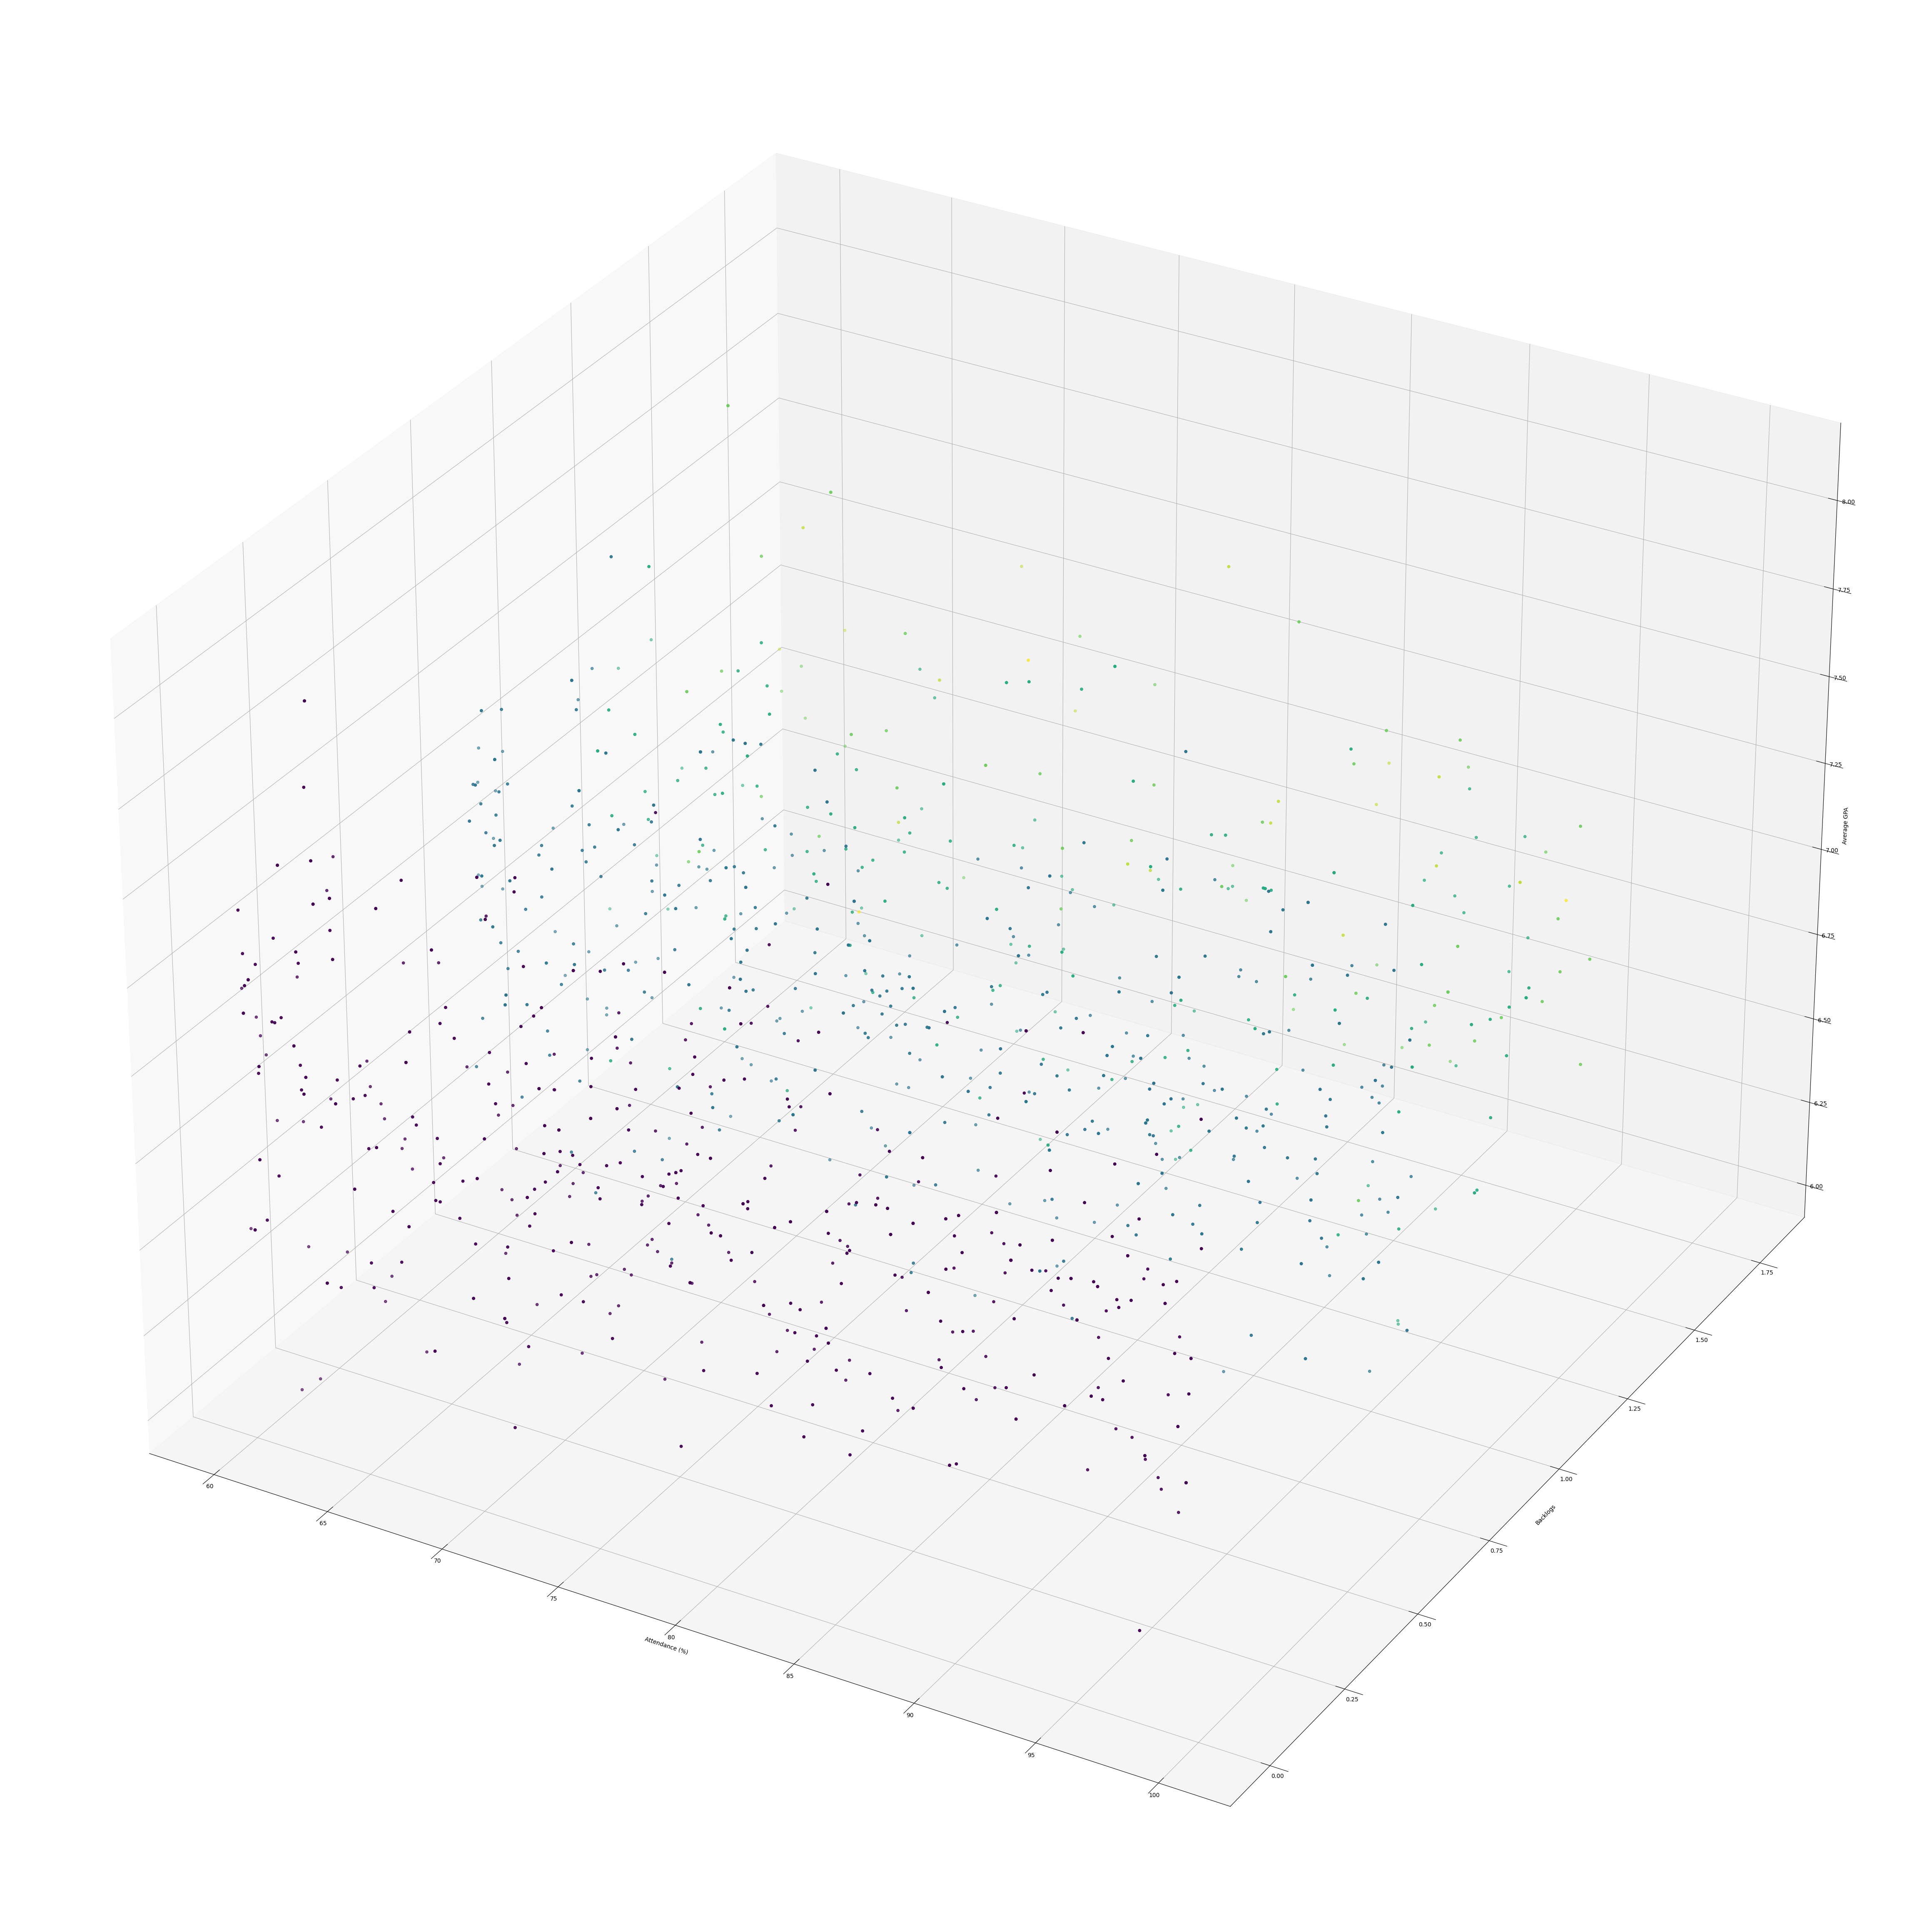

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(80, 60))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Attendance (%)'], df['Backlogs'], df['Average GPA'],
           c=df['Backlogs'])
ax.set_xlabel('Attendance (%)')
ax.set_ylabel('Backlogs')
ax.set_zlabel('Average GPA')
plt.show()


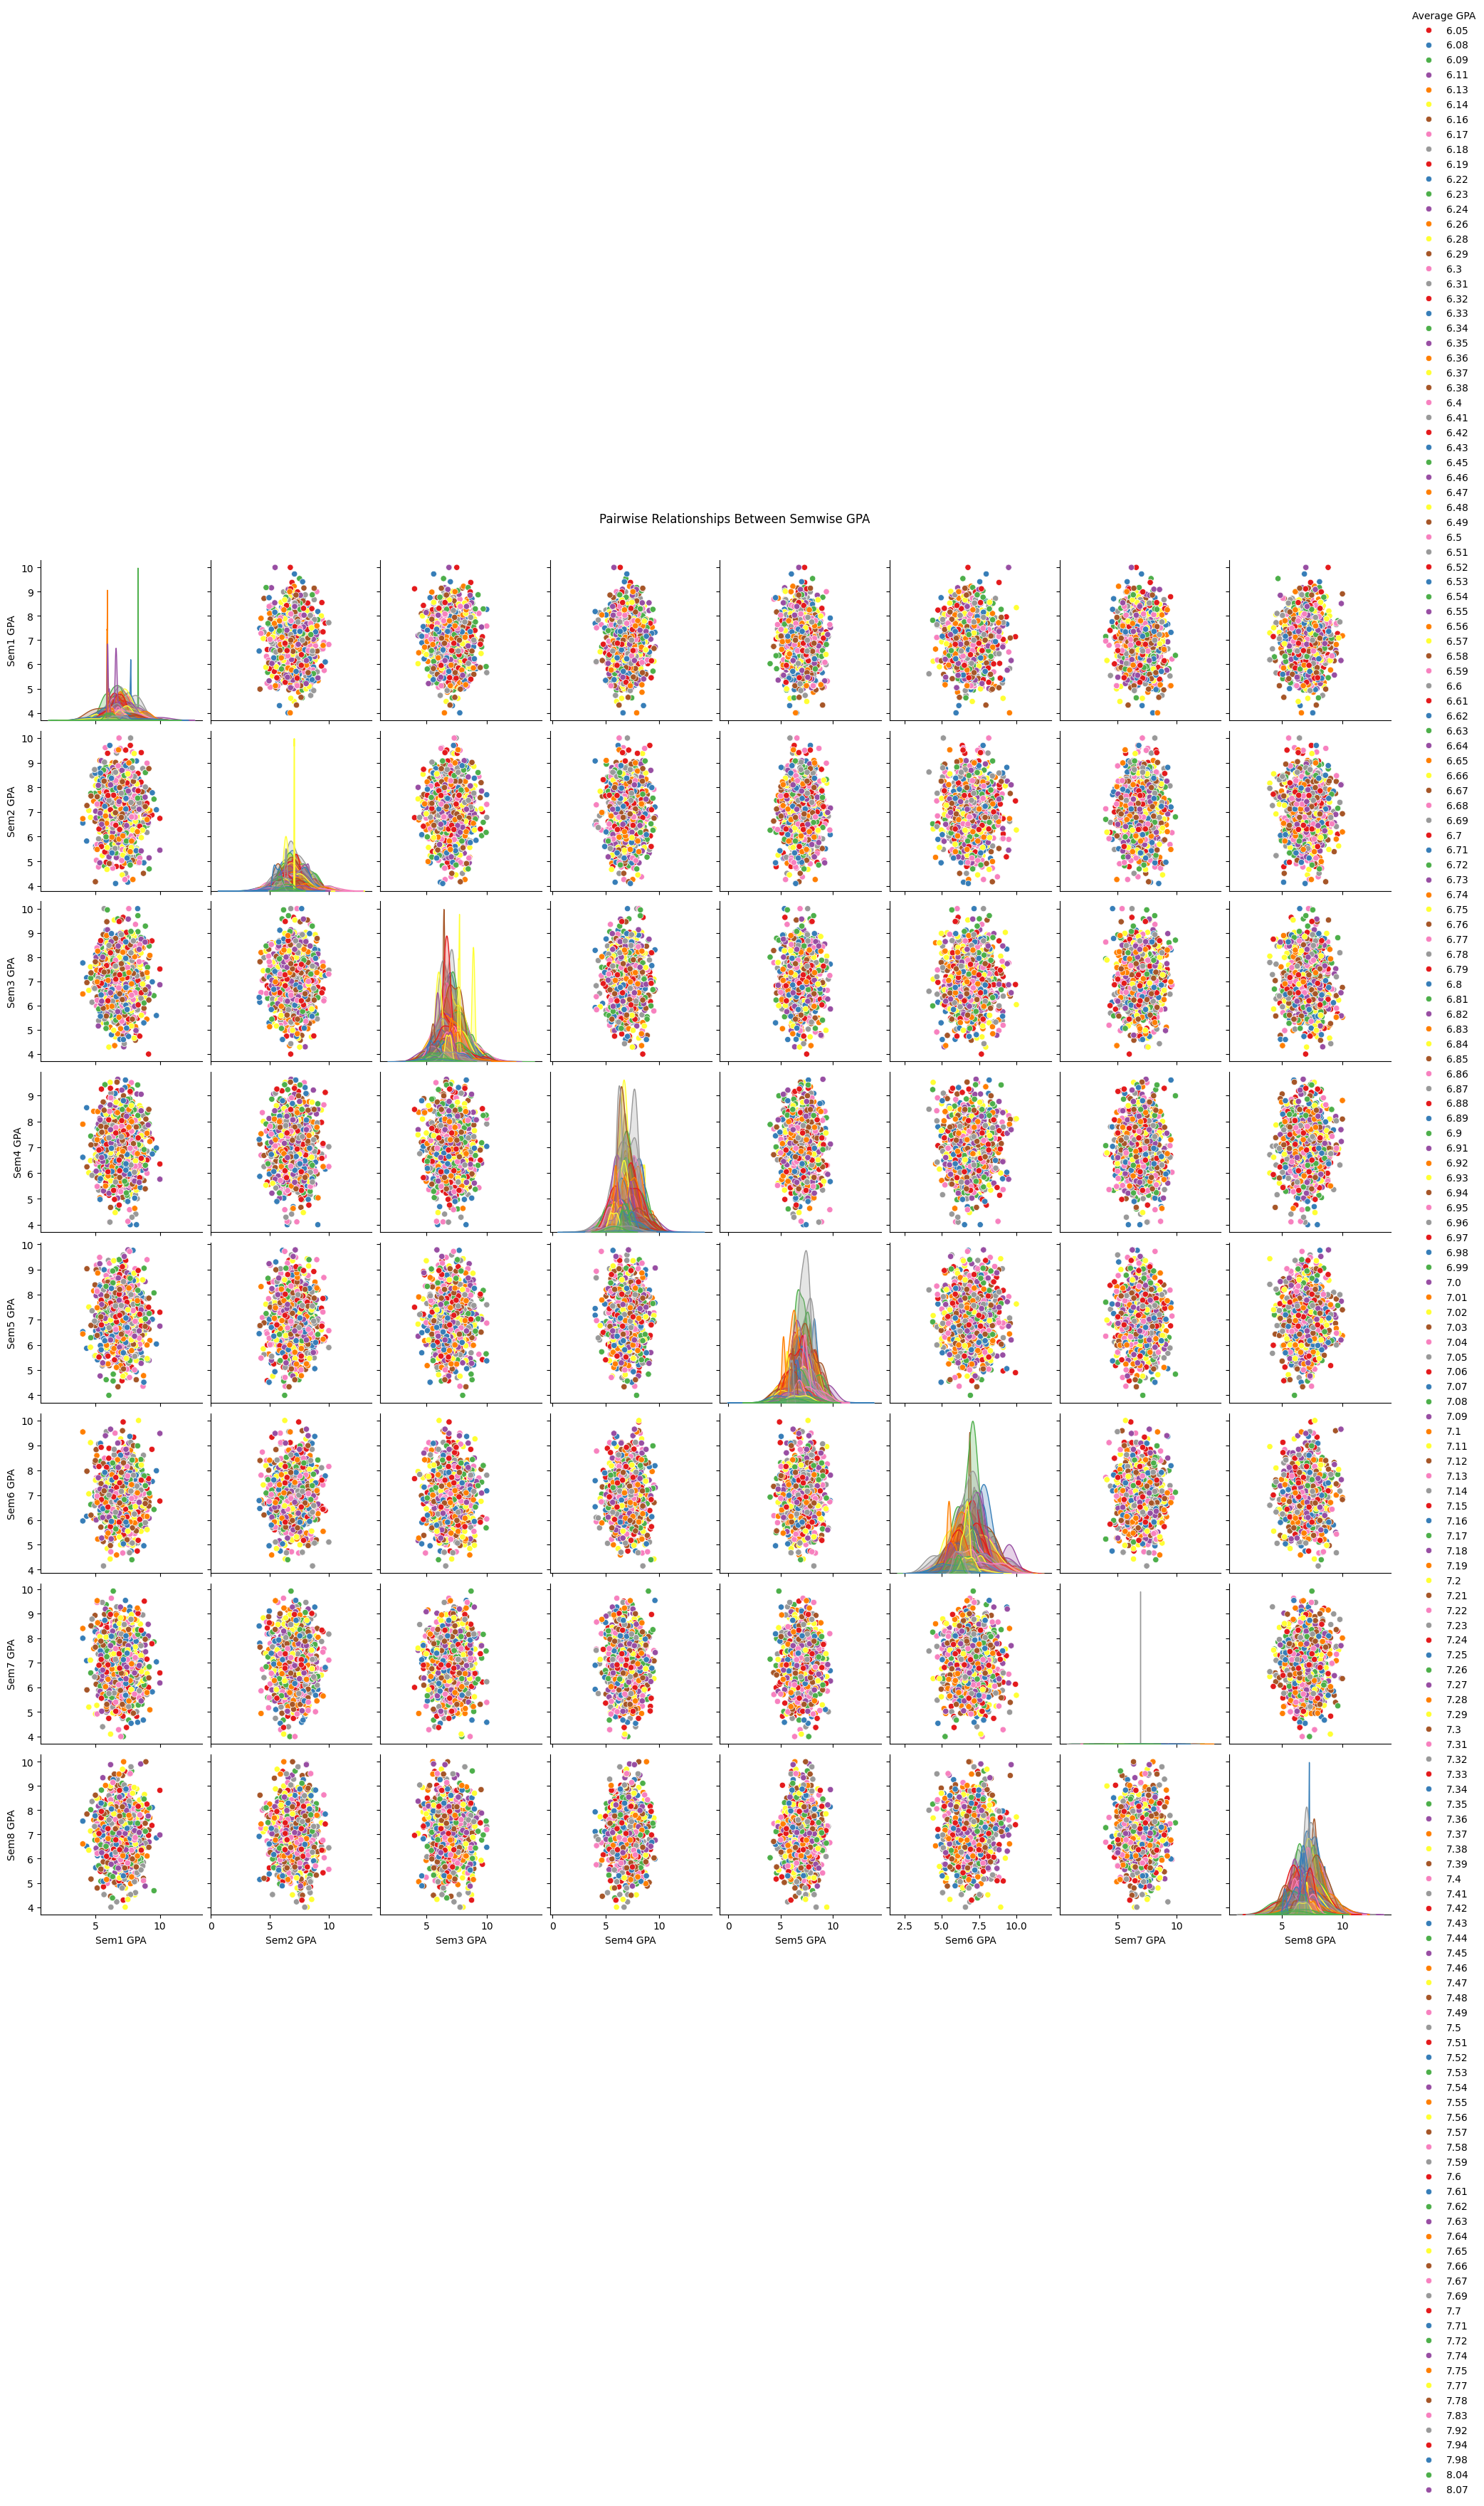

In [30]:
sns.pairplot(df, vars=['Sem1 GPA','Sem2 GPA','Sem3 GPA','Sem4 GPA','Sem5 GPA','Sem6 GPA','Sem7 GPA','Sem8 GPA'], hue='Average GPA', palette='Set1')
plt.suptitle("Pairwise Relationships Between Semwise GPA", y=1.02)
plt.show()


Strong Linear Correlation Between Semesters:
Scatterplots in many off-diagonal cells show strong clustering along a diagonal line.

This suggests a positive correlation — students who performed well in one semester tended to perform well in others.

#Stage 3

#**Feature Engineering**

In [31]:
#Encoding the categorical datas
categorical_data = df.select_dtypes(include=["object"])
categorical_data

Student ID                 Name  Gender  \
0     b37412a3-fa5c-40ca-b087-7109a47482d7                 Amit    Male   
1     65001423-faeb-4d19-a550-8ea26133a34d         Tina Ballard    Male   
2     228aaf1d-8710-4c8d-bfec-001b0df01f34                Meena  Female   
3     1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales    Male   
4     5122db4a-14c8-44d7-b2f4-e869f69d3dd7            Siddharth    Male   
...                                    ...                  ...     ...   
1994  27d7e5aa-dc11-40a7-9aff-586f00f8d55b                 Anil    Male   
1995  74f43a77-70a1-4e4c-a0c2-460d939618c9                Ramya  Female   
1996  88a613b4-a3b8-4f92-a3c9-0c6a86017633    Gregory Fernandez    Male   
1997  248c7b65-0c61-4277-9e95-44857b54d1a9               Vikram    Male   
1998  840d718e-de7b-4218-95bd-11db983c3cbd            Siddharth    Male   

     Branch Coding club Culturnal Club Robotics Literary Society  \
0      MECH          No             No      Yes              Yes   
1       ECE         Yes             No       No              Yes   
2     CIVIL          No             No       No              Yes   
3       ECE         Yes             No       No               No   
4       EEE          No             No      Yes               No   
...     ...         ...            ...      ...              ...   
1994     IT          No             No      Yes               No   
1995  CIVIL          No             No       No              Yes   
1996    EEE          No             No       No              Yes   
1997    CSE          No            Yes       No               No   
1998     IT          No             No      Yes               No   

     Entrepreneurship Cell  C++ Data Science Java Machine Learning Python  \
0                       No  Yes           No  Yes              Yes    Yes   
1                       No  Yes           No   No               No     No   
2                       No   No          Yes   No              Yes     No   
3                      Yes   No           No  Yes               No    Yes   
4                       No  Yes           No  Yes               No    Yes   
...                    ...  ...          ...  ...              ...    ...   
1994                   Yes  Yes          Yes  Yes               No     No   
1995                   Yes   No          Yes  Yes              Yes     No   
1996                    No   No          Yes   No               No     No   
1997                   Yes  Yes          Yes  Yes               No    Yes   
1998                    No   No           No  Yes              Yes    Yes   

      SQL Web Development Internship Done Placement Status  
0      No              No             Yes               No  
1     Yes             Yes              No               No  
2     Yes              No             Yes               No  
3     Yes              No              No              yes  
4     Yes              No             Yes               No  
...   ...             ...             ...              ...  
1994  Yes             Yes             Yes               No  
1995  Yes              No              No               No  
1996  Yes             Yes             Yes               No  
1997  Yes              No             Yes              yes  
1998  Yes             Yes              No               No  

[1999 rows x 18 columns]

In [32]:
categorical_cols = ['Gender', 'Branch', 'Coding club', 'Culturnal Club',	'Robotics',	'Literary Society',	'Entrepreneurship Cell',	'C++',	'Data Science',	'Java',	'Machine Learning'	,'Python'	,'SQL'	,'Web Development'	,'Internship Done',	'Placement Status']

In [33]:
#LabelEncoding the categorical datas
from sklearn.preprocessing import LabelEncoder, StandardScaler
labelEncoder = LabelEncoder()
for cols in categorical_cols:
   df[cols]= labelEncoder.fit_transform(df[cols])
df[categorical_cols].head()

Gender  Branch  Coding club  Culturnal Club  Robotics  Literary Society  \
0       1       5            0               0         1                 1   
1       1       2            1               0         0                 1   
2       0       0            0               0         0                 1   
3       1       2            1               0         0                 0   
4       1       3            0               0         1                 0   

   Entrepreneurship Cell  C++  Data Science  Java  Machine Learning  Python  \
0                      0    1             0     1                 1       1   
1                      0    1             0     0                 0       0   
2                      0    0             1     0                 1       0   
3                      1    0             0     1                 0       1   
4                      0    1             0     1                 0       1   

   SQL  Web Development  Internship Done  Placement Status  
0    0                0                1                 0  
1    1                1                0                 0  
2    1                0                1                 0  
3    1                0                0                 1  
4    1                0                1                 0

In [34]:
df.drop(columns=['Student ID','Name'],inplace=True)
df.head()

Age  Gender  Branch  Average GPA  Backlogs  Attendance (%)  Coding club  \
0   21       1       5         6.99  0.000000           70.45            0   
1   19       1       2         6.46  0.000000           65.45            1   
2   19       0       0         7.08  0.000000           84.79            0   
3   23       1       2         6.92  1.098612           62.26            1   
4   20       1       3         7.09  0.000000           97.12            0   

   Culturnal Club  Robotics  Literary Society  ...  Placement Status  \
0               0         1                 1  ...                 0   
1               0         0                 1  ...                 0   
2               0         0                 1  ...                 0   
3               0         0                 0  ...                 1   
4               0         1                 0  ...                 0   

   CTC (LPA)  Sem1 GPA  Sem2 GPA  Sem3 GPA  Sem4 GPA  Sem5 GPA  Sem6 GPA  \
0       0.00      8.34      5.24      6.06      7.81      7.18      7.04   
1       0.00      7.37      6.37      6.45      5.99      6.55      6.99   
2       0.00      5.79      8.82      7.03      6.92      7.67      6.01   
3       5.89      7.90      4.26      8.19      7.52      8.32      6.80   
4       0.00      6.86      6.24      7.64      7.15      5.91      6.18   

   Sem7 GPA  Sem8 GPA  
0      8.26      5.99  
1      6.46      5.52  
2      7.75      6.62  
3      4.94      7.43  
4      8.19      8.54  

[5 rows x 29 columns]

#**Feature Scaling**

In [35]:
#scaling the features for better prediction
Scaler = StandardScaler()
standardized_data= Scaler.fit_transform(df)
standardized_data

array([[ 0.30432616,  1.00551798,  1.41930439, ...,  0.10548521,
         1.24703081, -1.03110859],
       [-0.8533294 ,  1.00551798, -0.31315407, ...,  0.05308078,
        -0.52084618, -1.48623199],
       [-0.8533294 , -0.99451231, -1.46812638, ..., -0.97404598,
         0.74613233, -0.42104957],
       ...,
       [-1.43215719,  1.00551798,  0.26433208, ..., -0.25086489,
         2.49436624, -0.27579742],
       [ 0.88315395,  1.00551798, -0.89064023, ..., -0.24038401,
        -0.09852001,  0.02439035],
       [-0.27450162,  1.00551798,  0.84181824, ..., -0.43952083,
        -0.06905539,  0.17932597]])

In [36]:
cols=df.columns

In [37]:
standardized_data=pd.DataFrame(standardized_data, columns=cols,)
standardized_data

Age    Gender    Branch  Average GPA  Backlogs  Attendance (%)  \
0     0.304326  1.005518  1.419304    -0.036991 -1.147481       -0.723324   
1    -0.853329  1.005518 -0.313154    -1.590958 -1.147481       -1.149655   
2    -0.853329 -0.994512 -1.468126     0.226890 -1.147481        0.499391   
3     1.461982  1.005518 -0.313154    -0.242232  1.113921       -1.421653   
4    -0.274502  1.005518  0.264332     0.256210 -1.147481        1.550721   
...        ...       ...       ...          ...       ...             ...   
1994 -0.853329  1.005518  0.841818     2.015417  1.113921        1.152529   
1995  1.461982 -0.994512 -1.468126     0.725332 -1.147481        1.485066   
1996 -1.432157  1.005518  0.264332    -0.242232 -1.147481       -0.308079   
1997  0.883154  1.005518 -0.890640     0.256210 -1.147481        1.301744   
1998 -0.274502  1.005518  0.841818    -1.415037 -1.147481       -1.590480   

      Coding club  Culturnal Club  Robotics  Literary Society  ...  \
0       -0.699691       -0.440620  1.400529          1.394287  ...   
1        1.429202       -0.440620 -0.714016          1.394287  ...   
2       -0.699691       -0.440620 -0.714016          1.394287  ...   
3        1.429202       -0.440620 -0.714016         -0.717213  ...   
4       -0.699691       -0.440620  1.400529         -0.717213  ...   
...           ...             ...       ...               ...  ...   
1994    -0.699691       -0.440620  1.400529         -0.717213  ...   
1995    -0.699691       -0.440620 -0.714016          1.394287  ...   
1996    -0.699691       -0.440620 -0.714016          1.394287  ...   
1997    -0.699691        2.269531 -0.714016         -0.717213  ...   
1998    -0.699691       -0.440620  1.400529         -0.717213  ...   

      Placement Status  CTC (LPA)  Sem1 GPA  Sem2 GPA  Sem3 GPA  Sem4 GPA  \
0            -1.033063  -0.883245  1.411432 -1.784288 -0.934904  0.862538   
1            -1.033063  -0.883245  0.407382 -0.688627 -0.538976 -0.988088   
2            -1.033063  -0.883245 -1.228081  1.686919  0.049841 -0.042438   
3             0.967996   0.014340  0.955987 -2.734506  1.227474  0.567658   
4            -1.033063  -0.883245 -0.120520 -0.814677  0.669113  0.191432   
...                ...        ...       ...       ...       ...       ...   
1994         -1.033063  -0.883245  0.024394  0.659132  1.978722  0.455807   
1995         -1.033063  -0.883245  0.397031  0.455513 -0.234415 -0.611862   
1996         -1.033063  -0.883245 -1.921600 -1.551581 -0.000919  0.333788   
1997          0.967996   0.471514  1.463187  0.028885  1.359450 -1.343977   
1998         -1.033063  -0.883245 -1.052113  0.571867 -0.792776 -0.927078   

      Sem5 GPA  Sem6 GPA  Sem7 GPA  Sem8 GPA  
0     0.144393  0.105485  1.247031 -1.031109  
1    -0.495746  0.053081 -0.520846 -1.486232  
2     0.642279 -0.974046  0.746132 -0.421050  
3     1.302741 -0.146056 -2.013720  0.363312  
4    -1.146047 -0.795871  1.178280  1.438178  
...        ...       ...       ...       ...  
1994  0.540670  0.220775  1.158637  0.460147  
1995  0.032623 -1.078855  1.089886  1.757733  
1996  0.449222 -0.250865  2.494366 -0.275797  
1997 -0.485585 -0.240384 -0.098520  0.024390  
1998 -1.501680 -0.439521 -0.069055  0.179326  

[1999 rows x 29 columns]

In [38]:
df['Placement Status'].value_counts()

Placement Status
1    1032
0     967
Name: count, dtype: int64

In [39]:
#Drop the unrelevent datas
x= standardized_data.drop(columns=['CTC (LPA)','Placement Status'])
y= df['Placement Status']

#**Feature Selection**

As there are more number of feature in the data I have choosed the top relevant feature by verifying through the Correlation matrix.

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
selector= SelectKBest(score_func=f_classif,k=7)
x_new= selector.fit_transform(x,y)
selected_features= x.columns[selector.get_support()]
selected_features

Index(['Robotics', 'Literary Society', 'C++', 'Java', 'Internship Done',
       'Sem4 GPA', 'Sem6 GPA'],
      dtype='object')

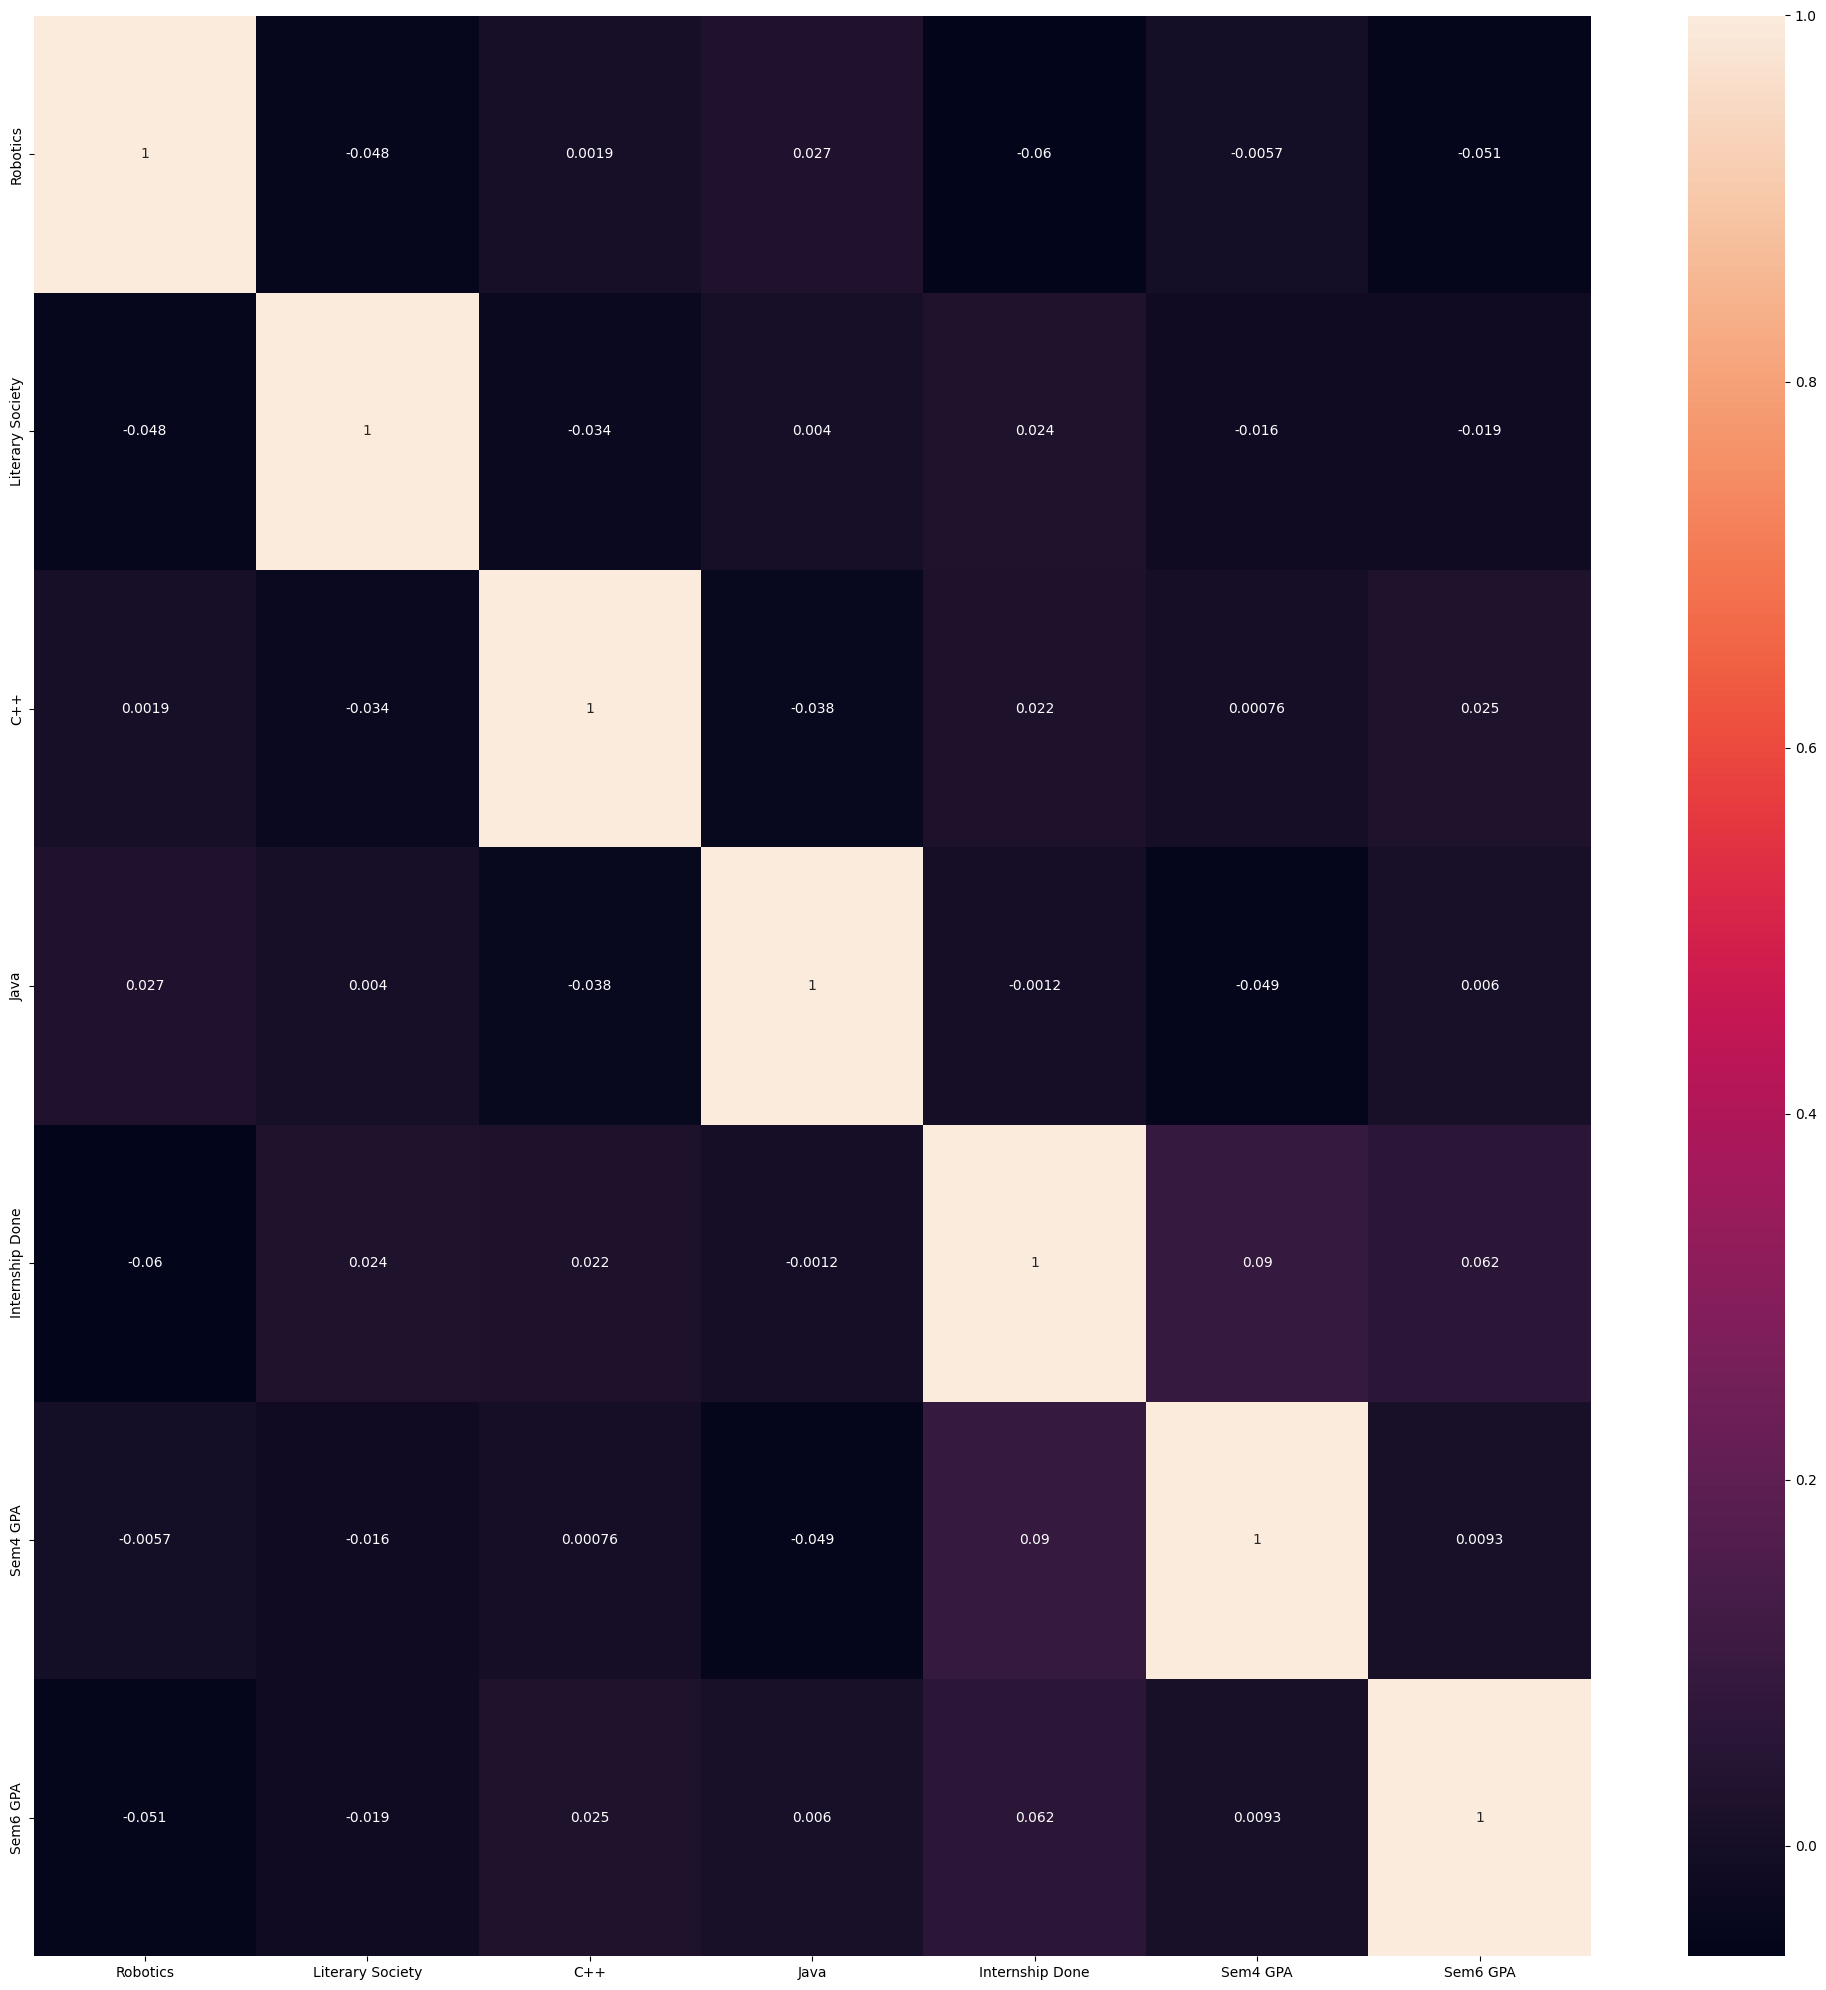

In [66]:
#ploting the heatmap to find the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(standardized_data[selected_features].corr(), annot= True,)
plt.tight_layout()
plt.show()

In [42]:
y.shape

(1999,)

In [43]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_new, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(1599, 7)

In [45]:
x_test.shape

(400, 7)

In [46]:
y_train.shape

(1599,)

In [47]:
y_test.shape

(400,)

#**Model Building**

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [49]:
import numpy as np
print(np.unique(y_train))

[0 1]


In [50]:
#Logistical Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)
y_predLogistic = model.predict(x_test)

In [51]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,y_predLogistic))
print('precision_score',precision_score(y_test,y_predLogistic))
print('recall_score',recall_score(y_test,y_predLogistic))
print('f1_score',f1_score(y_test,y_predLogistic))
print('confusion_matrix',confusion_matrix(y_test,y_predLogistic))

Accuracy_score 0.54
precision_score 0.5732758620689655
recall_score 0.6100917431192661
f1_score 0.5911111111111111
confusion_matrix [[ 83  99]
 [ 85 133]]


In [52]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, max_depth = 30,)
model.fit(x_train, y_train)
y_predRandom = model.predict(x_test)

In [53]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,y_predRandom))
print('precision_score',precision_score(y_test,y_predRandom))
print('recall_score',recall_score(y_test,y_predRandom))
print('f1_score',f1_score(y_test,y_predRandom))
print('confusion_matrix',confusion_matrix(y_test,y_predRandom))


Accuracy_score 0.895
precision_score 0.9112149532710281
recall_score 0.8944954128440367
f1_score 0.9027777777777778
confusion_matrix [[163  19]
 [ 23 195]]


In [54]:
#XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:02:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [55]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,xgb_pred))
print('precision_score',precision_score(y_test,xgb_pred))
print('recall_score',recall_score(y_test,xgb_pred))
print('f1_score',f1_score(y_test,xgb_pred))
print('confusion_matrix',confusion_matrix(y_test,xgb_pred))


Accuracy_score 0.88
precision_score 0.9086538461538461
recall_score 0.8669724770642202
f1_score 0.8873239436619719
confusion_matrix [[163  19]
 [ 29 189]]


In [56]:
#SVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

In [57]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,svm_pred))
print('precision_score',precision_score(y_test,svm_pred))
print('recall_score',recall_score(y_test,svm_pred))
print('f1_score',f1_score(y_test,svm_pred))
print('confusion_matrix',confusion_matrix(y_test,svm_pred))

Accuracy_score 0.5825
precision_score 0.6
recall_score 0.7018348623853211
f1_score 0.6469344608879493
confusion_matrix [[ 80 102]
 [ 65 153]]


In [58]:
#Kneighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [59]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,knn_pred))
print('precision_score',precision_score(y_test,knn_pred))
print('recall_score',recall_score(y_test,knn_pred))
print('f1_score',f1_score(y_test,knn_pred))
print('confusion_matrix',confusion_matrix(y_test,knn_pred))

Accuracy_score 0.6
precision_score 0.6355140186915887
recall_score 0.6238532110091743
f1_score 0.6296296296296297
confusion_matrix [[104  78]
 [ 82 136]]


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.8361559561128526


In [61]:
best_m = grid_search.best_estimator_
y_pred = best_m.predict(x_test)
print(" Accuracy after Hyperparameter Tuning:", accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))

 Accuracy after Hyperparameter Tuning: 0.875
precision_score 0.8962264150943396
recall_score 0.8715596330275229
f1_score 0.8837209302325582
confusion_matrix [[160  22]
 [ 28 190]]


## Project Documentation

#Problem Statement:

To develop a predictive model that classifies whether a student will get placed or not based on their academic performance, skill development pathways, and extracurricular involvement. The model aims to uncover key factors that influence placement outcomes and provide actionable insights for students and academic institutions to improve employability.


Scope:
The project will leverage historical student data—such as grades, course selections, certifications, internships, soft skills, and other relevant features—to predict placement status (Placed or Not Placed) and identify significant contributors to successful placements.


Goal:
Predict the placement status of students.
Analyze which performance metrics and development pathways (technical skills, soft skills, internships, etc.) have the highest impact on placement outcomes.
Enable data-driven decision-making for students and career counselors.



#Data Collection:
Source: https://raw.githubusercontent.com/lawrence0302/DSML/refs/heads/main/Student%20Final.csv

Shape : (1999, 34)

Features:

Student ID,
Name,
Age,
Gender,
Branch,
Average GPA,
Backlogs,
Attendance (%),
Coding club,
Culturnal Club,
Robotics,
Literary Society,
Entrepreneurship Cell,
C++,
Data Science,
Java,
Machine Learning,
Python,
SQL,
Web Development,
Internship Done,
Internship Domain,
Placement Status,
Placement Domain,
CTC (LPA),
Alumni Path,
Sem1 GPA,
Sem2 GPA,
Sem3 GPA,
Sem4 GPA,
Sem5 GPA,
Sem6 GPA,
Sem7 GPA,
Sem8 GPA


##Data Preprocessing:
Missing Values: Imputed using drop for as those columns are irrelevant.

Outliers: Detected and removed using the IQR method.

Categorical Encoding: LabelEncoder applied to convert categorical variables into numerical format.

Feature Scaling: StandardScaler applied to normalize numerical values.

Feature Selection: SelectKBest used to select top 5 features based on ANOVA F-score.

##Feature Engineering:
Encoded: Encoded all the categorical columns

Scaled: Scaled all the columns so it will be well suited for model design.

Selected Top Features:  Robotics,Literary Society,C++,Java, Internship Done,
Sem4 GPA, Sem6 GPA.

##Model Building:

1.   Model: Logistic Regression
    *   Accuracy: 54%
    *   F1 Score: 0.59
    * Notes: Simple, interpretable

2.   Model: Model: Random Forest
    *   Accuracy: 89%
    *   F1 Score: 0.899
    * Notes: Best performance, robust model

3.   Model: XGBoost
    *   Accuracy:88%
    *   F1 Score: 0.88
    *  Notes: Good model, interpretable

4.   Model: SVC
    *   Accuracy:58%
    *   F1 Score: 0.64
    * Notes: Captures non-linearity well

5.   Model:  Kneighbour
    *   Accuracy:60%
    *   F1 Score: 0.63
    *  Notes: Simple, interpretable




















## Best  Model

Random Forest


##Findings & Interpretations

1. Academic Performance Strongly Influences Placement

Interpretation: Students with higher cumulative grades (CGPA or percentage) were significantly more likely to get placed.Academic consistency is often a baseline requirement for recruiters. Strong grades signal discipline and capability, increasing the likelihood of clearing eligibility criteria and aptitude rounds.

2. Internship Experience Boosts Placement Probability

Interpretation: Students with internship experience had a notably higher placement rate.Internships offer practical exposure and often lead to pre-placement offers (PPOs). They also enhance a candidate’s profile, making them more job-ready in the eyes of recruiters.

3. Technical Skills & Certifications Matter

Interpretation: Participation in technical skill development programs (e.g., coding bootcamps, online certifications) was correlated with higher placement success. In-demand technical skills aligned with industry needs (e.g., Python, Data Science, Web Development) are key differentiators in a competitive job market.

# **Conclusion**
The "Pathways & Performance: A Student Insight Report" project successfully achieved its goal of predicting student placement outcomes by analyzing a range of academic, technical, and behavioral factors. Through extensive experimentation and evaluation of various machine learning algorithms, the Random Forest classifier emerged as the most effective model, delivering high accuracy, robustness to overfitting, and strong interpretability.

The Random Forest model not only provided reliable classification of whether a student is likely to be placed or not, but also highlighted the most influential features contributing to placement success. Key drivers included consistent academic performance, relevant certifications, internship experience, and participation in skill development activities.

By leveraging these insights, educational institutions can design more targeted career support programs, and students can better understand and improve the aspects of their profiles that are most likely to enhance their employability. Ultimately, this data-driven approach empowers both stakeholders to make informed decisions, bridging the gap between education and industry expectations.